## First we start with Importing all the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

from ydata_profiling import ProfileReport

- importing "application_data" csv file to jupyter notebook

In [2]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Creating the column list of the columns in a dataset.
column_list = list(df.columns)

In [4]:
column_list

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
# Finding number of Rows and Columns in a dataset
df.shape

(307511, 122)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Finding null values in a Dataframe 

df.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [8]:
# By using for loop function, we found that we have columns having missing values more than 2 lakh also.

for i in column_list:
    print (df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
12
278
1292
0
0
0
0
0
0
0
0
0
202929
0
0
0
0
0
0
96391
2
0
0
0
0
0
0
0
0
0
0
0
173378
660
60965
156061
179943
150007
204488
214865
163891
154828
153020
208642
182590
210199
154350
213514
169682
156061
179943
150007
204488
214865
163891
154828
153020
208642
182590
210199
154350
213514
169682
156061
179943
150007
204488
214865
163891
154828
153020
208642
182590
210199
154350
213514
169682
210295
154297
148431
156341
145755
1021
1021
1021
1021
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
41519
41519
41519
41519
41519
41519


In [9]:
# By using Loop function we try to find the null values in percentage.

for i in column_list:
    print (((df[i].isnull().sum() / df.shape[0])*100).round(2))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09
0.42
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
65.99
0.0
0.0
0.0
0.0
0.0
0.0
31.35
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
56.38
0.21
19.83
50.75
58.52
48.78
66.5
69.87
53.3
50.35
49.76
67.85
59.38
68.35
50.19
69.43
55.18
50.75
58.52
48.78
66.5
69.87
53.3
50.35
49.76
67.85
59.38
68.35
50.19
69.43
55.18
50.75
58.52
48.78
66.5
69.87
53.3
50.35
49.76
67.85
59.38
68.35
50.19
69.43
55.18
68.39
50.18
48.27
50.84
47.4
0.33
0.33
0.33
0.33
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.5
13.5
13.5
13.5
13.5
13.5


In [10]:
# By analyzing columns, our decision is to drop the columns having missing values more than 1,00,000 or more than 30%. 

df.columns[df.isnull().sum() > 100000]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [11]:
# Droping the columns who have missing values more than 100000.

df.drop(columns= df.columns[df.isnull().sum() > 100000], inplace=True)

In [12]:
# By using shape function we found that we successfully dropped 49 columns in a dataset.

df.shape

(307511, 73)

In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
column_list = df.columns

In [15]:
# Again run a loop function to find how many columns still having missing values.

for i in column_list:
    print (df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
12
278
1292
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
96391
2
0
0
0
0
0
0
0
0
0
0
0
660
60965
1021
1021
1021
1021
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
41519
41519
41519
41519
41519
41519


In [16]:
# Fetch the columns which have missing values only, now we can analyze the columns one by one and approach each column accordingly.

df.columns[df.isnull().sum() > 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

====================================================================================================
- First we took a ‘occupation type’ column which has 96,391 missing values.
- we cannot drop this column as it’s a categorical column of occupation of customers which is a important factor to give loans accordingly.
- It also helps us in further analysis.


In [17]:
df['OCCUPATION_TYPE'].isnull().sum()

96391

In [18]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

- We cannot impute the missing values with mode option as missing values are more that 25% and if we do so it fluctuate our analysis.
- Now our approach to handle this column is that we can create separate category of missing values named ‘Unknown’.

In [19]:
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [20]:
df['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Unknown                  31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

- As you can see that ‘Unknown’ category contributed 31%  in occupation column.

In [21]:
# Now fetching all the columns only which have null values.

df.columns[df.isnull().sum() > 0]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

- Now we took ‘AMT_ANNUITY’ column in which we have only 12 missing values.

In [22]:
df['AMT_ANNUITY'].isnull().sum()

12

In [23]:
df['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

- Plotting distribution plot to find the value distribution.

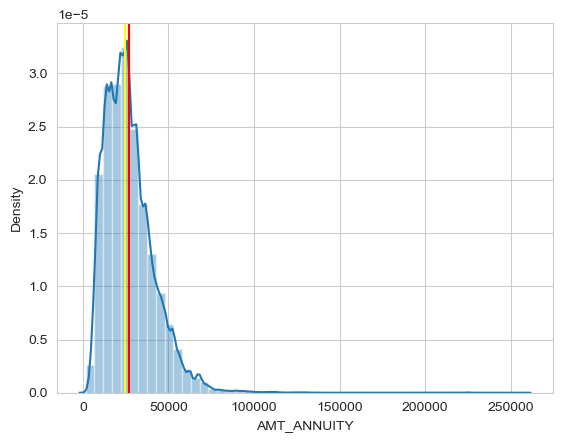

In [24]:
sns.set_style('whitegrid')
sns.distplot(df['AMT_ANNUITY'])
plt.axvline(df['AMT_ANNUITY'].mean(),color='red')
plt.axvline(df['AMT_ANNUITY'].median(),color='yellow')
plt.show()

In [25]:
# Finding skewess

df['AMT_ANNUITY'].skew()

1.5797773638612507

- Our approach to handle this column is According to the skew value we can fill the null values with the median value as we found it has positive skewnwess.

In [26]:
df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median(), inplace=True)

- Now we took ‘AMT_GOODS_PRICE’ column in which we have only 278 missing values.

In [27]:
df['AMT_GOODS_PRICE'].isnull().sum()

278

In [28]:
df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

- Plotting distribution plot to find the value distribution.

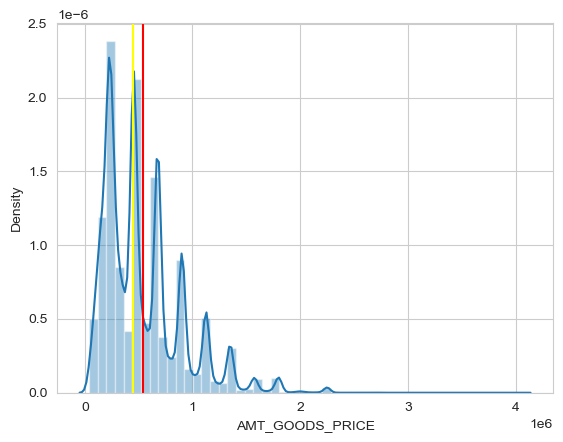

In [29]:
sns.distplot(df['AMT_GOODS_PRICE'])
plt.axvline(df['AMT_GOODS_PRICE'].mean(),color='red')
plt.axvline(df['AMT_GOODS_PRICE'].median(),color='yellow')
plt.show()

In [30]:
# Finding skewness

df['AMT_GOODS_PRICE'].skew()

1.3490003414747445

- Our approach to handle this column is According to the skew value we can fill the null values with the median value as we found it has positive skewnwess.

In [31]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

- Now we took ‘AMT_GOODS_PRICE’ column in which we have only 1292 missing values.

In [32]:
df['NAME_TYPE_SUITE'].isnull().sum()

1292

In [33]:
(df['NAME_TYPE_SUITE'].isnull().sum() / df.shape[0]) * 100

0.42014757195677555

In [34]:
df['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

- Then we found that it’s a categorical column in which ‘Unaccompanied’ category contributed 81%.
- So our approach to handle this column is that we impute the ‘Unaccompanied’ category at missing values through mode option because this category already contributed 81% and the missing values is 0.33%, if we do so it does not affect our analysis.

In [35]:
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [36]:
df['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.238720
Family             13.056118
Spouse, partner     3.697429
Children            1.062401
Other_B             0.575589
Other_A             0.281616
Group of people     0.088127
Name: proportion, dtype: float64

- As we can see that, after replacing the missing values with ‘Unaccompanied’ category, it still having 81% of contribution.

In [37]:
# Fetching remaining null value columns.

df.columns[df.isnull().sum() > 0]

Index(['CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

- Now we took ‘EXT_SOURCE_2’ column in which we have 660 missing values which 0.21% of the total rows in a dataset and it’s a numerical column.


In [38]:
df['EXT_SOURCE_2'].isnull().sum()

660

In [39]:
df['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

- We plot distplot in a variable and also plot mean line with red color & median line with yellow color and found that the data in variable is negatively skewed.

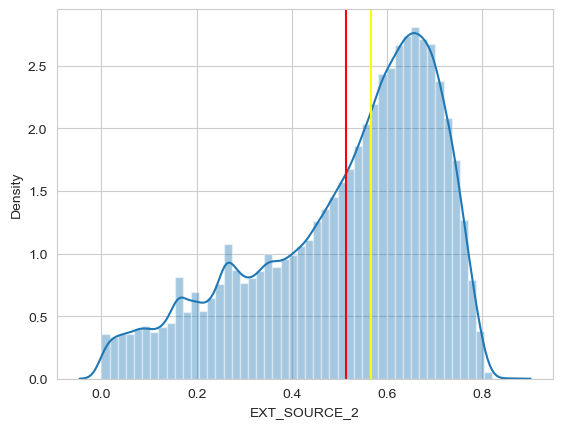

In [40]:
sns.distplot(df['EXT_SOURCE_2'])
plt.axvline(df['EXT_SOURCE_2'].mean(), color='red')
plt.axvline(df['EXT_SOURCE_2'].median(), color='yellow')
plt.show()

In [41]:
# Finding skewness

df['EXT_SOURCE_2'].skew()

-0.7935760449636996

- So finally our approach to handle this column is to fill the missing values with the median value according the skew value.

In [42]:
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median(), inplace=True)

- Now we took ‘EXT_SOURCE_3’ column in which we have 60,965 missing values which is almost 20% of the total rows in a dataset and it’s a numerical column.

In [43]:
df['EXT_SOURCE_3'].isnull().sum()

60965

In [44]:
df['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [45]:
# Finding skewness

df['EXT_SOURCE_3'].skew()

-0.4093904596160267

- We plot distplot in a variable and also plot mean line with red color & median line with yellow color and found that the data in variable is negatively skewed.

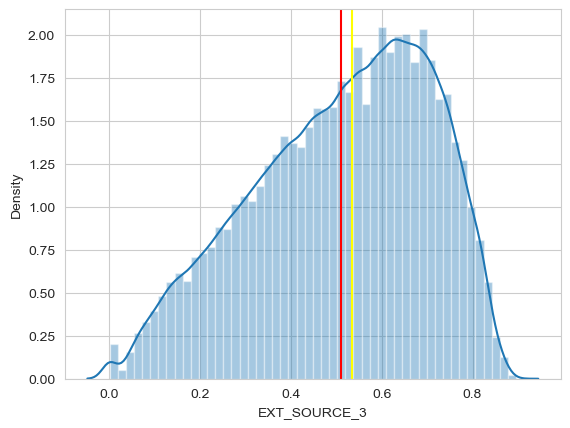

In [46]:
sns.distplot(df['EXT_SOURCE_3'])
plt.axvline(df['EXT_SOURCE_3'].mean(), color='red')
plt.axvline(df['EXT_SOURCE_3'].median(), color='yellow')
plt.show()

- We have 3 rules of skewness :
	(1) 0.5 to 0.5 ( Low or almost symmetrical)
	(2) 1 to -0.5 & 0.5 to 1 (Moderately skewed)
	(3) Beyond -1 and 1 (Highly skewed)
- Our skeweness value lies in 1st condition under rules of skewness which is almost symmetrical.
- So finally our approach to handle this column is to fill the missing values with the mean value.

In [47]:
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

- Now we took ‘OBS_30_CNT_SOCIAL_CIRCLE’ column in which we have 1021 missing values.

In [48]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

- We found that the data is positvely skewed.

In [49]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

- So our approach to handle this column is to fill the missing values with median function.

In [50]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

- Now we took ‘DEF_30_CNT_SOCIAL_CIRCLE’ column in which we have 1021 missing values.

In [51]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

- We found that the data is positvely skewed.

In [52]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

- So our approach to handle this column is to fill the missing values with median function.

In [53]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

In [54]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

- Now we took ‘OBS_60_CNT_SOCIAL_CIRCLE’ column in which we have 1021 missing values.

In [55]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

- We found that the data is positvely skewed.

In [56]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

- So our approach to handle this column is to fill the missing values with median function.

In [57]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

- Now we took ‘DEF_60_CNT_SOCIAL_CIRCLE’ column in which we have 1021 missing values.

In [58]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

- We found that the data is positvely skewed.

In [59]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

- So our approach to handle this column is to fill the missing values with median function.

In [60]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

- Now we took “DAYS_LAST_PHONE_CHANGE” column in which we have only 1 null value.

In [61]:
df['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

- Now our approach to handle this column is that we simply drop that 1 row only.

In [62]:
df = df[~df['DAYS_LAST_PHONE_CHANGE'].isnull()]

- Now we took “AMT_REQ_CREDIT_BUREAU_HOUR” column in which we have 41,518 missing values.

In [63]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage and also put describe function.
- We found that we have “0.0” is occurring more than 99% of the data and all mean median min 3rd quartile is 0.


In [64]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [65]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

- So our approach to handle this column is to fill the missing values with mode function that is 0.

In [66]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0], inplace=True)

- Now we took “AMT_REQ_CREDIT_BUREAU_DAY” column in which we have 41,518 missing values.

In [67]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage.
- We found that we have “0.0” is occurring more than 99% of the data and all mean median min 3rd quartile is 0.

In [68]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [69]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

- So our approach to handle this column is to fill the missing values with mode function that is 0.

In [70]:
df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0], inplace=True)

- Now we took “AMT_REQ_CREDIT_BUREAU_WEEK” column in which we have 41,518 missing values.

In [71]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage and also put describe function.
- We found that we have “0.0” is occurring more than 96% of the data and all mean median min 3rd quartile is 0.

In [72]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [73]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

- So our approach to handle this column is to fill the missing values with mode function that is 0.

In [74]:
df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0], inplace=True)

- Now we took “AMT_REQ_CREDIT_BUREAU_MON” column in which we have 41,518 missing values.

In [75]:
df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage.
- We found that we have “0.0” is occurring more than 83% of the data and all mean median min 3rd quartile is 0.

In [76]:
df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [77]:
df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

- So our approach to handle this column is to fill the missing values with mode function that is 0.

In [78]:
df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0], inplace=True)

- Now we took “AMT_REQ_CREDIT_BUREAU_QRT” column in which we have 41,518 missing values.

In [79]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage.
- We found that we have “0.0” is occurring more than 80% of the data.

In [80]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [81]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

- So our approach to handle this column is to fill the missing values with mode function that is 0.

In [82]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0], inplace=True)

- Now we took “AMT_REQ_CREDIT_BUREAU_YEAR” column in which we have 41,471 missing values.

In [83]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41518

- Then we apply the value count function in percentage to find repeatable values in percentage and also describe function.

In [84]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

In [85]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

- We plot distplot in a variable and also plot mean line with red color & median line with yellow color and found that the data in variable is negatively skewed.

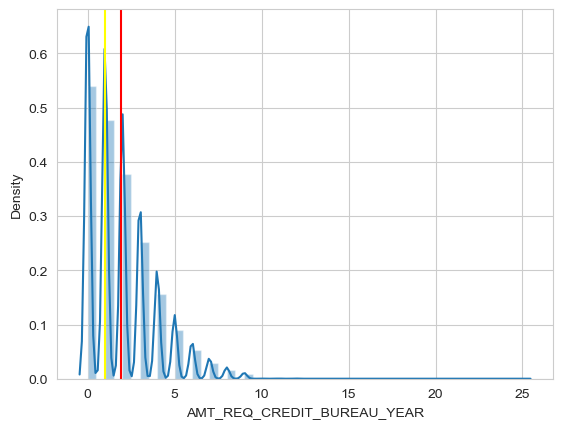

In [86]:
sns.distplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.axvline(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), color='red')
plt.axvline(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), color='yellow')
plt.show()

In [87]:
# Finding skewness

df['AMT_REQ_CREDIT_BUREAU_YEAR'].skew()

1.2435900041416592

- Our approach to to handle this column is that the skew value lies under 3rd category of skeweness so if the skew value is above 1 that means the variable is highly positive skewed, so we suppose to fill the null values with median.

In [88]:
df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].median(), 
                                        inplace=True)

- Now we took 'CNT_FAM_MEMBERS' column in which we have only 2 null values.

In [89]:
df['CNT_FAM_MEMBERS'].isnull().sum()

2

In [90]:
# Describe variable to analyse mean median mode

df['CNT_FAM_MEMBERS'].describe()

count    307508.000000
mean          2.152666
std           0.910683
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [91]:
# Value counts of numbers.

df['CNT_FAM_MEMBERS'].value_counts()

CNT_FAM_MEMBERS
2.0     158356
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

- Our approach to handle this column is to fill the missing values with median only as we seen above that median is also 2 and repetable count of 2 is the highest, we can use both mode and median function to impute the missing values.

In [92]:
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(),inplace=True)

- Now checking if any null values in columns are remaining

In [93]:
for i in column_list:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


- Now we dont have any missing values in columns.
- Now our next job is to analyse the columns if they have wrong datatype, not sensible values so we can correct them etc.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307510 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   FLAG_OWN_CAR                 307510 non-null  object 
 5   FLAG_OWN_REALTY              307510 non-null  object 
 6   CNT_CHILDREN                 307510 non-null  int64  
 7   AMT_INCOME_TOTAL             307510 non-null  float64
 8   AMT_CREDIT                   307510 non-null  float64
 9   AMT_ANNUITY                  307510 non-null  float64
 10  AMT_GOODS_PRICE              307510 non-null  float64
 11  NAME_TYPE_SUITE              307510 non-null  object 
 12  NAME_INCOME_TYPE             307510 non-null  object 
 13  NAME

In [95]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

- In 'CODE-GENDER' column we found that we have only 4 values out of 3,07,511 which create another category XNA.

In [96]:
df[df['CODE_GENDER']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0


- So we have 2 approach to handle this situation is firstly we simply drop these 4 rows having XNA values or we can replace them with 'F'.
- Our approach is drop the 4 rows.

In [97]:
df = df[~(df['CODE_GENDER']=='XNA')]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307506 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307506 non-null  int64  
 1   TARGET                       307506 non-null  int64  
 2   NAME_CONTRACT_TYPE           307506 non-null  object 
 3   CODE_GENDER                  307506 non-null  object 
 4   FLAG_OWN_CAR                 307506 non-null  object 
 5   FLAG_OWN_REALTY              307506 non-null  object 
 6   CNT_CHILDREN                 307506 non-null  int64  
 7   AMT_INCOME_TOTAL             307506 non-null  float64
 8   AMT_CREDIT                   307506 non-null  float64
 9   AMT_ANNUITY                  307506 non-null  float64
 10  AMT_GOODS_PRICE              307506 non-null  float64
 11  NAME_TYPE_SUITE              307506 non-null  object 
 12  NAME_INCOME_TYPE             307506 non-null  object 
 13  NAME

- Now I found that 20 'FLAG_DOCUMENT' columns are of no use for us in analysis, so our approach is simply drop these 20 columns.

In [99]:
# First trying to extract these 20 columns.

df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21']

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
# Now droping these 20 columns.

df = df.drop(columns = df.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'])

In [101]:
# Now we have only 53 columns out of 122.

df.shape

(307506, 53)

- Now we took 'DAYS_REGISTRATION' column and we found that these values is in 'float64' format and days can't be in decimal format.

In [102]:
df['DAYS_REGISTRATION']

0        -3648.0
1        -1186.0
2        -4260.0
3        -9833.0
4        -4311.0
           ...  
307506   -8456.0
307507   -4388.0
307508   -6737.0
307509   -2562.0
307510   -5128.0
Name: DAYS_REGISTRATION, Length: 307506, dtype: float64

- So our approach is to convert DAYS_REGISTRATION column values into 'int64' format.

In [103]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].astype('int64')

- Now we took 'CNT_FAM_MEMBERS' column and we found that these values is in 'float64' format and count can't be in decimal format.

In [104]:
df['CNT_FAM_MEMBERS']

0         1.0
1         2.0
2         1.0
3         2.0
4         1.0
         ... 
307506    1.0
307507    1.0
307508    1.0
307509    2.0
307510    2.0
Name: CNT_FAM_MEMBERS, Length: 307506, dtype: float64

- So our approach is to convert DAYS_REGISTRATION column values into 'int64' format.

In [105]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype('int64')

- Now we took 'DAYS_LAST_PHONE_CHANGE' column and we found that these values is in 'float64' format and days can't be in decimal format.

In [106]:
df['DAYS_LAST_PHONE_CHANGE']

0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307506, dtype: float64

- So our approach is to convert DAYS_REGISTRATION column values into 'int64' format.

In [107]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].astype('int64')

- Now we took 'ORGANIZATION_TYPE' column in which we found that some category has 2-3 has sub-category.

In [108]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

- Our approach to handle this situation is to convert sub-category into single category.

In [109]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Industry' if 'Industry' in x else x)

In [110]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Business' if 'Business' in x else x)

In [111]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Trade' if 'Trade' in x else x)

In [112]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].apply(lambda x: 'Transport' if 'Transport' in x else x)

- Re-checking the column

In [113]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business               84528
XNA                    55374
Self-employed          38412
Other                  16683
Trade                  14314
Industry               14310
Medicine               11192
Government             10404
Transport               8990
School                  8893
Kindergarten            6879
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307506 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307506 non-null  int64  
 1   TARGET                       307506 non-null  int64  
 2   NAME_CONTRACT_TYPE           307506 non-null  object 
 3   CODE_GENDER                  307506 non-null  object 
 4   FLAG_OWN_CAR                 307506 non-null  object 
 5   FLAG_OWN_REALTY              307506 non-null  object 
 6   CNT_CHILDREN                 307506 non-null  int64  
 7   AMT_INCOME_TOTAL             307506 non-null  float64
 8   AMT_CREDIT                   307506 non-null  float64
 9   AMT_ANNUITY                  307506 non-null  float64
 10  AMT_GOODS_PRICE              307506 non-null  float64
 11  NAME_TYPE_SUITE              307506 non-null  object 
 12  NAME_INCOME_TYPE             307506 non-null  object 
 13  NAME

- Now we took 'DAYS_BIRTH' column and we found that all the values are not in correct format as all have minus values.

In [115]:
df['DAYS_BIRTH'].describe()

count    307506.000000
mean     -16037.051540
std        4363.968767
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

- Our approach to handle this column is we convert this column values into absolute format.

In [116]:
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])

- Through feature engineering we created a new column named 'AGE' having the age of an individual and we extracted the AGE of an individual from 'DAYS_BIRTH' column.

In [117]:
df['AGE'] = df['DAYS_BIRTH'].apply(lambda x:x//365)

- Now we took 'DAYS_EMPLOYED' column, it also had some minus values.

In [118]:
df['DAYS_EMPLOYED'].describe()

count    307506.000000
mean      63816.137688
std      141276.654931
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

- Our approach is we convert the minus values to absolue values in column.

In [119]:
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

- Through feature engineering we created a new column named 'EMPLOYED_YEAR' having the employed year of an individual and we extracted the employed year of an individual from 'DAYS_EMPLOYED' column.

In [120]:
df['EMPLOYED_YEAR'] = df['DAYS_EMPLOYED'].apply(lambda x: x//365)

- Now we took 'DAYS_REGISTRATION' column, it also had some minus values.

In [121]:
df['DAYS_REGISTRATION'].describe()

count    307506.000000
mean      -4986.132014
std        3522.888740
min      -24672.000000
25%       -7479.750000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

- Our approach is we convert the minus values to absolue values in column.

In [122]:
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

- Through feature engineering we created a new column named 'REGISTRATION_YEAR' having the registration year of an individual and we extracted the registration year of an individual from 'DAYS_REGISTRATION' column.

In [123]:
df['REGISTRATION_YEAR'] = df['DAYS_REGISTRATION'].apply(lambda x:x//365)

- Now we took 'DAYS_ID_PUBLISH' column, it also had some minus values.

In [124]:
df['DAYS_ID_PUBLISH'].describe()

count    307506.000000
mean      -2994.207911
std        1509.453053
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

- Our approach is we convert the minus values to absolue values in column.

In [125]:
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])

- Through feature engineering we created a new column named 'PUBLISH_YEAR' having the publish year of an individual and we extracted the publish year of an individual from 'DAYS_ID_PUBLISH' column.

In [126]:
df['PUBLISH_YEAR'] = df['DAYS_ID_PUBLISH'].apply(lambda x:x//365)

- Now we took 'DAYS_LAST_PHONE_CHANGE' column, it also had some minus values.

In [127]:
df['DAYS_LAST_PHONE_CHANGE'].describe()

count    307506.000000
mean       -962.860546
std         826.811491
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

- Our approach is we convert the minus values to absolue values in column.

In [128]:
df['DAYS_LAST_PHONE_CHANGE'] = abs(df['DAYS_LAST_PHONE_CHANGE'])

- Through feature engineering we created a new column named 'LAST_PHONE_CHANGE_YEAR' having the last phone change year of an individual and we extracted the last phone change year year of an individual from 'DAYS_LAST_PHONE_CHANGE' column.

In [129]:
df['LAST_PHONE_CHANGE_YEAR'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: x//365)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307506 entries, 0 to 307510
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307506 non-null  int64  
 1   TARGET                       307506 non-null  int64  
 2   NAME_CONTRACT_TYPE           307506 non-null  object 
 3   CODE_GENDER                  307506 non-null  object 
 4   FLAG_OWN_CAR                 307506 non-null  object 
 5   FLAG_OWN_REALTY              307506 non-null  object 
 6   CNT_CHILDREN                 307506 non-null  int64  
 7   AMT_INCOME_TOTAL             307506 non-null  float64
 8   AMT_CREDIT                   307506 non-null  float64
 9   AMT_ANNUITY                  307506 non-null  float64
 10  AMT_GOODS_PRICE              307506 non-null  float64
 11  NAME_TYPE_SUITE              307506 non-null  object 
 12  NAME_INCOME_TYPE             307506 non-null  object 
 13  NAME

====================================================================================================================
- Now we drop the columns from which we extract the values and converted in years and save it to the new column with the help of Feature Engineering.

In [131]:
df.drop(columns = df.loc[:,'DAYS_BIRTH':'DAYS_ID_PUBLISH'], inplace=True)

In [132]:
df = df.drop(columns = ['DAYS_LAST_PHONE_CHANGE'])

- With the help of Feature engineering we divide AGE column into AGE_GROUP column to find which age group is more interested in Loans and being default.

In [133]:
# First we find minimum and maximum age for grouping.

print(df['AGE'].min())
print(df['AGE'].max())

20
69


In [134]:
# Create a new 'AGE_GROUP' by grouping the AGE column with the difference of 10 years

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=np.arange(20,71,10), labels=['20-30','30-40','40-50','50-60','60-70'])

In [135]:
df['AGE_GROUP'].value_counts()

AGE_GROUP
30-40    83116
40-50    74401
50-60    67818
20-30    52802
60-70    29368
Name: count, dtype: int64

- With the help of Feature engineering we divide Income of client into 5 groups to analyze which Income slab are more interested in Loans and being default.

In [136]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075060e+05
mean     1.687978e+05
std      2.371250e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [137]:
# Creating a new categorical column INCOME_GROUP with 5 slabs and divided income with the help of quantile.

df['INCOME_GROUP'] = pd.qcut(df['AMT_INCOME_TOTAL'], 
                             q=[0,0.2,0.5,0.75,0.95,1], 
                             labels=['Very Low','Low','Medium','High','Very High'])

In [138]:
df['INCOME_GROUP'].value_counts()

INCOME_GROUP
Low          90087
Medium       82212
Very Low     63671
High         57501
Very High    14035
Name: count, dtype: int64

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307506 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307506 non-null  int64   
 1   TARGET                       307506 non-null  int64   
 2   NAME_CONTRACT_TYPE           307506 non-null  object  
 3   CODE_GENDER                  307506 non-null  object  
 4   FLAG_OWN_CAR                 307506 non-null  object  
 5   FLAG_OWN_REALTY              307506 non-null  object  
 6   CNT_CHILDREN                 307506 non-null  int64   
 7   AMT_INCOME_TOTAL             307506 non-null  float64 
 8   AMT_CREDIT                   307506 non-null  float64 
 9   AMT_ANNUITY                  307506 non-null  float64 
 10  AMT_GOODS_PRICE              307506 non-null  float64 
 11  NAME_TYPE_SUITE              307506 non-null  object  
 12  NAME_INCOME_TYPE             307506 non-null  obj

### Now we extract Categorical Columns and Numerical Columns in a dataset.

In [140]:
categorical_columns = list(df.select_dtypes(include=['object','category']).columns)
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'AGE_GROUP',
 'INCOME_GROUP']

In [141]:
numerical_columns = list(df.select_dtypes(include=['int64','float64']).columns)
print (numerical_columns)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'EMPLOYED_YEAR', 'REGISTRATION_YEAR', 'PUBLISH_YEAR', 'LAST_PHONE_CHANGE_YEAR']


# Now we start our Analysis

### Checking for Imbalance data

In [142]:
# Checking imbalance ratio

df['TARGET'].value_counts()[0] / df['TARGET'].value_counts()[1]

11.386948640483384

In [143]:
# Checking value counts

df['TARGET'].value_counts()

TARGET
0    282681
1     24825
Name: count, dtype: int64

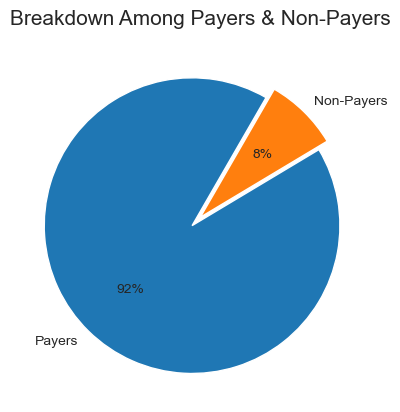

In [144]:
# Plotting pie chart to find how many percentage of Payers & Non-Payers we have.

df['TARGET'].value_counts(normalize=True).plot.pie(autopct='%.0f%%',
                                                   explode=[0.08,0], 
                                                   startangle= 60, 
                                                   labels=['Payers','Non-Payers'])
plt.title('Breakdown Among Payers & Non-Payers', fontsize=15)
plt.ylabel('')
plt.show()

## Insights
- Across all the applications including Male & Female we have 8% applicants that may face difficulty in repaying the installments and remaining 92% are not having any difficulties to repay the loan.
- We have numbers also only 24,825 applicants facing difficulties in repaying the loan amount and 2,82,681 applicants does not have any difficulty to repay the loan amount.

### We suppose to find how the data is distributed across Male and Female.

In [145]:
# Checking value counts of column CODE_GENDER

df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105058
Name: count, dtype: int64

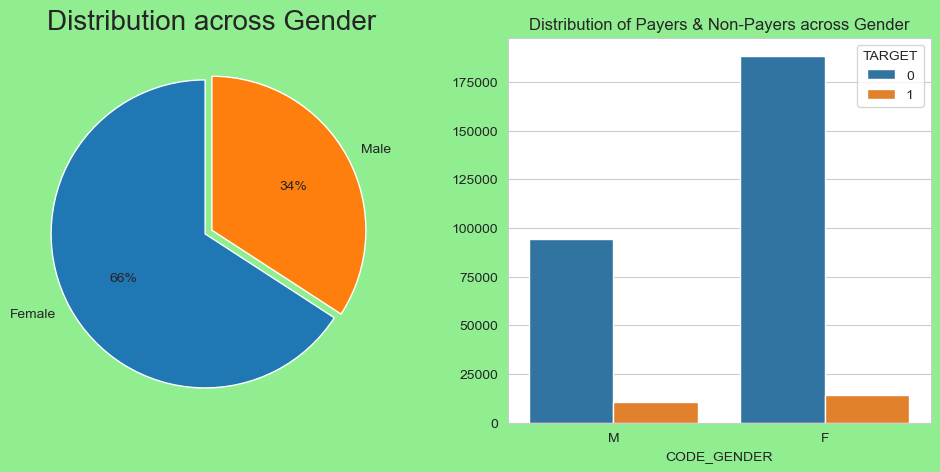

In [146]:
# Plotting both pie chart & bar graph to move forward my analysis.

plt.figure(figsize=[12,5]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%', 
                                          explode=[0.05,0], 
                                          startangle=90, 
                                          labels=['Female','Male'])
                                          
plt.title('Distribution across Gender', fontsize=20)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(x=df['CODE_GENDER'], hue=df['TARGET'])
plt.title('Distribution of Payers & Non-Payers across Gender')
plt.ylabel('')

plt.show()   

## Insights

- At very first we find that in all the application we have 34% Male & 66% Female applicants.
- Also we have numbers also that is we have 1,05,058 Male & 2,02,448 Female applications
- In the 2nd bargraph we found that defaulters are very less in numbers which is less than 25,000 across Gender.
- Now we move step deeper into analysis

===========================================================================================================
## Now we suppose to find Gender distribution among Payers & Non-Payers

In [147]:
# Checking value counts of CODE_GENDER for only Non-Payers.

df[df['TARGET'] == 1]['CODE_GENDER'].value_counts()

CODE_GENDER
F    14170
M    10655
Name: count, dtype: int64

In [148]:
# Checking value counts of CODE_GENDER for only Payers.

df[df['TARGET'] == 0]['CODE_GENDER'].value_counts()

CODE_GENDER
F    188278
M     94403
Name: count, dtype: int64

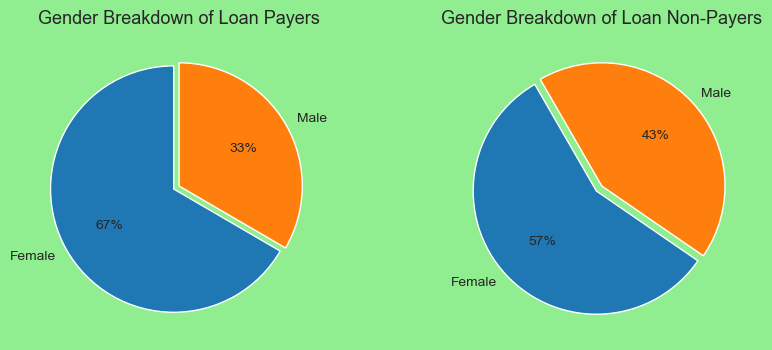

In [149]:
# Plotting 2 different pie charts for Loan payers & Non-payers to get insights.

plt.figure(figsize=[10,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df[df['TARGET'] == 0]['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%', 
                                                             explode=[0.05,0],                                                            
                                                             startangle=90, 
                                                             labels=['Female','Male'])
plt.title('Gender Breakdown of Loan Payers', fontsize=13)
plt.ylabel('')

plt.subplot(1,2,2)
df[df['TARGET'] == 1]['CODE_GENDER'].value_counts().plot.pie(autopct= '%.0f%%', 
                                                             explode=[0.06,0], 
                                                             startangle=120, 
                                                             labels=['Female','Male'])
plt.title('Gender Breakdown of Loan Non-Payers', fontsize=13 )
plt.ylabel('')

plt.show()

## Insights
- In the 1st Pie chart, Across all the repayers we have 33% Male % 67% Female repayers who have good credit history.
- We have numbers also, we have 94,403 Male & 1,88,278 Female repayer who have good credit history.
- In the 2nd pie chart, we found that we have 43% Male and 57% Female Defaulters.
- We have numbers also, we have 10,655 Male & 14,170 Female defaulters.

In [150]:
# Checking value counts of Contract Types

df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278231
Revolving loans     29275
Name: count, dtype: int64

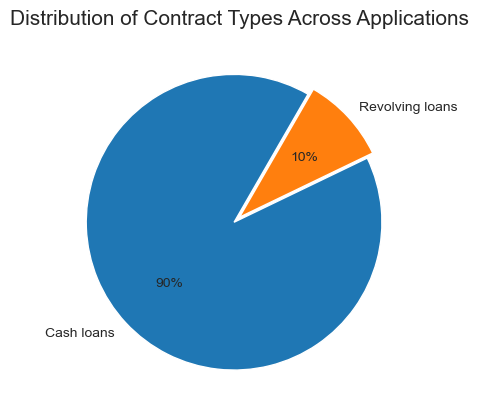

In [151]:
# Plotting pie chart to know visually how data is distributed across Contract Types.

df['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%.0f%%', 
                                                 explode=[0.05,0], 
                                                 startangle=60)
plt.title('Distribution of Contract Types Across Applications', fontsize=15)
plt.ylabel('')

plt.show()

## Insights
- We found that Across all the Loan Applications we have 10% Revolving loans & 90% Cash loans applicants.

In [152]:
# Checking value counts of Contract Type for only Non-Payers.

df[df['TARGET']==1]['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         23221
Revolving loans     1604
Name: count, dtype: int64

In [153]:
# Checking value counts of Contract Type for only Payers.

df[df['TARGET']==0]['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         255010
Revolving loans     27671
Name: count, dtype: int64

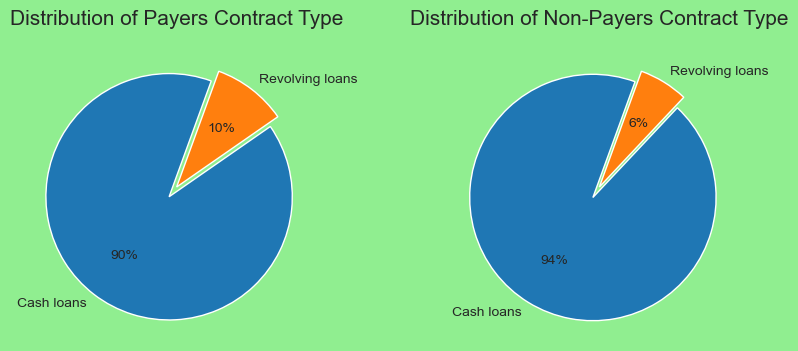

In [154]:
# Plotting 2 different pie charts for Payers & Non-Payers to find how Contract type contributed in it.

plt.figure(figsize=[10,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df[df['TARGET']==0]['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%.0f%%', 
                                                                  explode=[0.1,0], 
                                                                  startangle=70)
plt.title('Distribution of Payers Contract Type', fontsize=15)
plt.ylabel('')
                                                                  
plt.subplot(1,2,2)
df[df['TARGET']==1]['NAME_CONTRACT_TYPE'].value_counts().plot.pie(autopct='%.0f%%', 
                                                                  explode=[0.1,0], 
                                                                  startangle=70)
plt.title('Distribution of Non-Payers Contract Type', fontsize=15)
plt.ylabel('')

plt.show()

## Insights
- In the above 1st pie chart we found that Across all the Good loan payers Cash loans contributed 90% applicants and only 10% Revolving loans applicants.
- We have numbers also Cash loans have 2,55,010 Good loan payers applications and Revolving loans have 27,671 applications.
- In the above 2nd pie chart we found that Across all the default applicants 94% are the Cash loans customer facing difficulties to repay the Loan amount and only 6% are the Revolving loans where customer facing difficulty.
- We have numbers also Cash loans contributed 23,221 default applications & Revolving loans contributed 1,604  default applications.

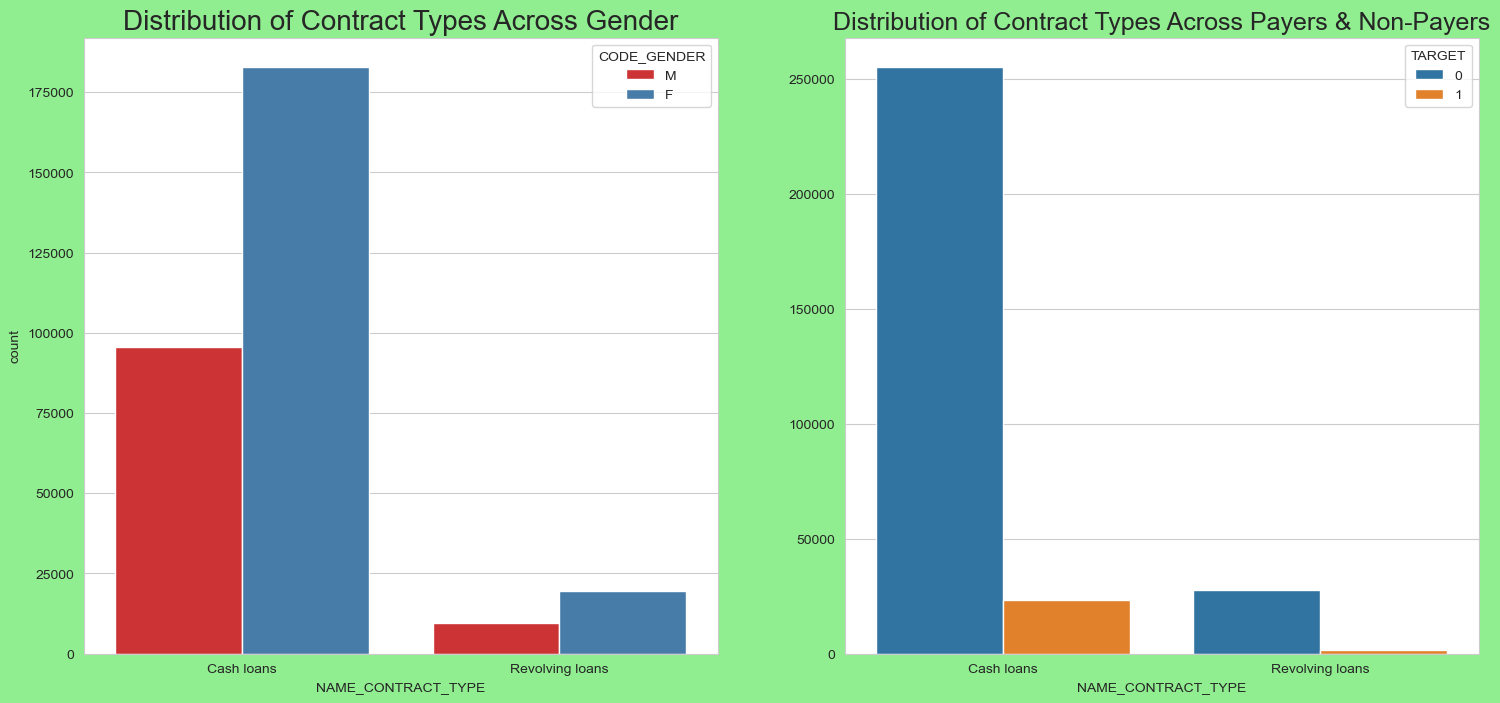

In [155]:
# Plotting 2 different bar plots to know contribution of Contract types across Male & Female and Payers & Non-Payers.

plt.figure(figsize=[18,8]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
sns.countplot(x=df['NAME_CONTRACT_TYPE'], hue=df['CODE_GENDER'], palette=sns.color_palette('Set1'))
plt.title('Distribution of Contract Types Across Gender', fontsize=20)

plt.subplot(1,2,2)
sns.countplot(x=df['NAME_CONTRACT_TYPE'], hue=df['TARGET'])
plt.title('Distribution of Contract Types Across Payers & Non-Payers', fontsize=18)
plt.ylabel('')

plt.show()

## Insights
- In the above 1st bargraph we found that Female applicants are highly interested in availing Loan facility specially in Cash Loans as compared to Male applicants.
- In the above 2nd bargraph we found that Defaulters are very less in numbers as compared to Loan payers, also we found that Cash loan facility is the most popular category among all the applicants.
- We found that Cash loans are the most popular among Male & Females as compared to Revolving loans.
- We should focus on Cash loans offers.

In [156]:
# Checking value counts applicants having Car or not.

df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202922
Y    104584
Name: count, dtype: int64

In [157]:
# Checking value counts of applicants having Car by Gender

df[df['FLAG_OWN_CAR']=='Y']['CODE_GENDER'].value_counts()

CODE_GENDER
M    59625
F    44959
Name: count, dtype: int64

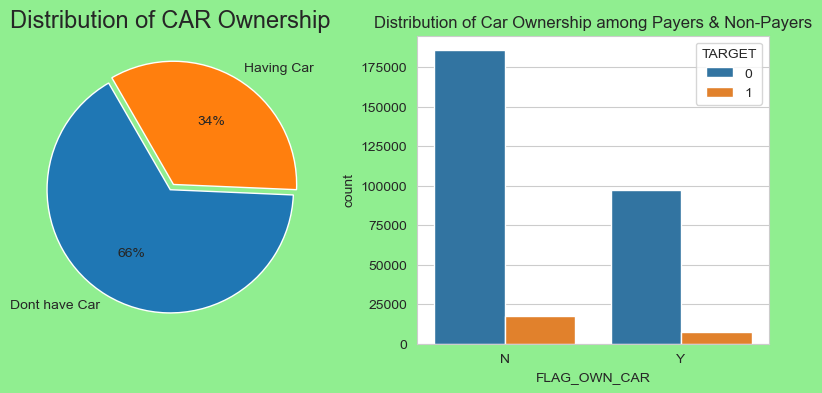

In [158]:
# Plotting pie chart & bar plot to know how the Car Ownership data is distributed among Payers & Non-Payers.

plt.figure(figsize=[10,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df['FLAG_OWN_CAR'].value_counts().plot.pie(autopct='%.0f%%',
                                          explode=[0,0.05],
                                          startangle=120,
                                          labels=['Dont have Car','Having Car'])
plt.title('Distribution of CAR Ownership', fontsize=17)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(x=df['FLAG_OWN_CAR'], hue=df['TARGET'])
plt.title('Distribution of Car Ownership among Payers & Non-Payers')

plt.show()

## Insights
- In the 1st pie chart we found that 34% (2,00,427) applicants doesnt have Car and remaining 66% (1,03,306) dont have cars.
- In the 2nd bar plot we found that those applicants who dont have cars they are more likely to repay the loan amount.

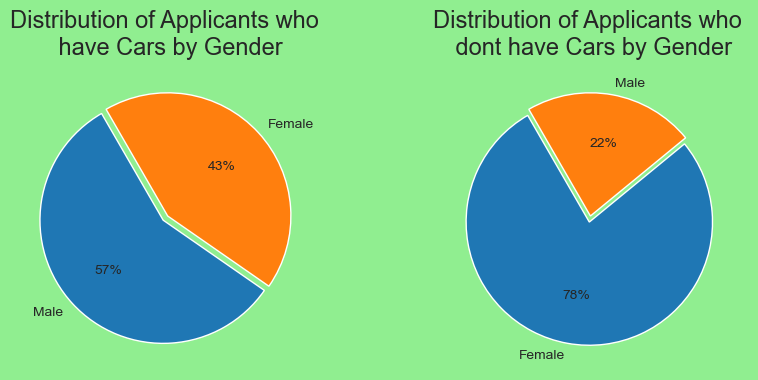

In [159]:
# Plotting 2 different pie charts to know the Gender Distribution by Cars

plt.figure(figsize=[10,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df[df['FLAG_OWN_CAR']=='Y']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%', 
                                                                   startangle=120, 
                                                                   explode=[0.05,0],
                                                                  labels=['Male','Female'])
                                                                   
                                                              
plt.title('Distribution of Applicants who \n have Cars by Gender', fontsize=17)
plt.ylabel('')
                                                                   
plt.subplot(1,2,2)
df[df['FLAG_OWN_CAR']=='N']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%', 
                                                                   startangle=120, 
                                                                   explode=[0.05,0],
                                                                  labels=['Female','Male'])                                                                 
                                                                         
plt.title('Distribution of Applicants who \n dont have Cars by Gender', fontsize=17)
plt.ylabel('')

plt.show()                                                                   

## Insights
- Female applicants who dont have cars are the soft target for Loan facility as they are more likely to repay the Loan amount.

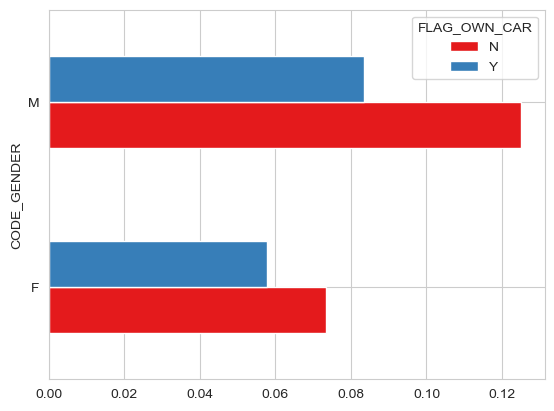

In [160]:
# Plotting to get the insight by Gender who have cars or not by their repayment.

pd.pivot_table(data=df, index= 'CODE_GENDER', columns='FLAG_OWN_CAR', values='TARGET').plot.barh(color=sns.color_palette('Set1'))
plt.show()

## Insights 
- Male applicants who doesnt have Car are the ones they have highest chances to be a Defaulter.

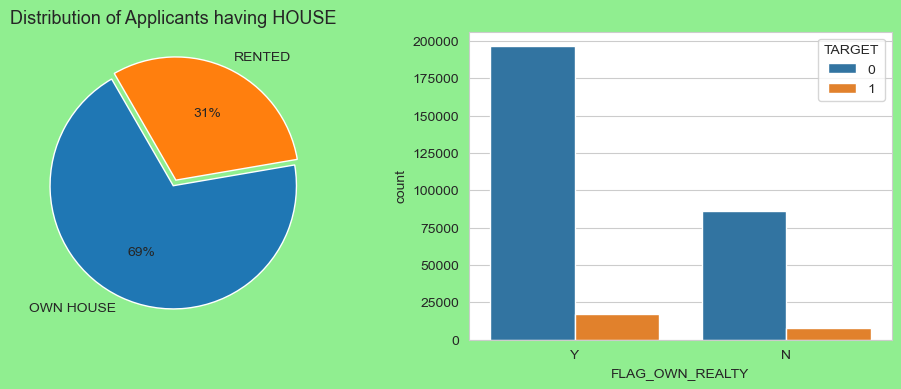

In [161]:
# Plotting 2 plots to know how OWN REALTY data is distributed among Payers & Non-Payers.

plt.figure(figsize=[12,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df['FLAG_OWN_REALTY'].value_counts().plot.pie(autopct='%.0f%%',
                                             explode=[0,0.05],
                                             startangle=120,
                                             labels=['OWN HOUSE','RENTED'])
plt.title('Distribution of Applicants having HOUSE', fontsize=13)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(x=df['FLAG_OWN_REALTY'], hue=df['TARGET'])

plt.show()

## Insights
- In the first pie chart we found that we have 69% applicants having their own house or flat and remaining 31% applicants living in rented property or something else.
- In the 2nd bar plot we found that those applicants who have their own house are highly capable to repay the loan installments as compared to who dont have their own house.

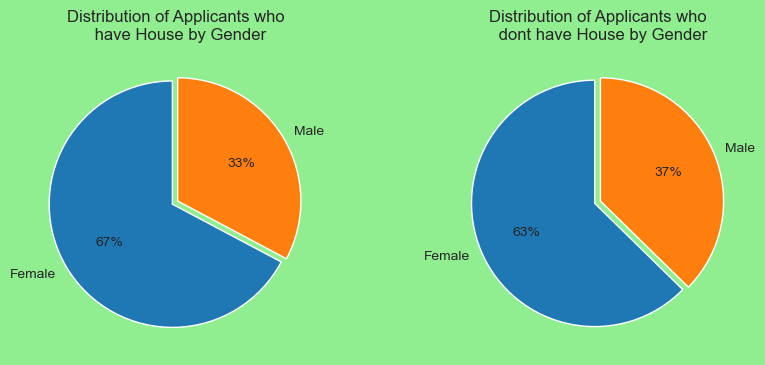

In [162]:
# Plotting 2 pie charts to get insights that how MALE & FEMALE distributed to those who have house or living in rented property.

plt.figure(figsize=[10,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df[df['FLAG_OWN_REALTY']=='Y']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                     explode=[0.05,0],
                                                                     startangle=90,
                                                                      labels=['Female','Male'])
plt.title('Distribution of Applicants who \n have House by Gender')
plt.ylabel('')

plt.subplot(1,2,2)
df[df['FLAG_OWN_REALTY']=='N']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                     explode=[0.05,0],
                                                                     startangle=90,
                                                                      labels=['Female','Male'])
plt.title('Distribution of Applicants who \n dont have House by Gender')
plt.ylabel('')
                                                                     
plt.show()                                                             

## Insights
- Female candidates in both cases are the soft targets for loan products.

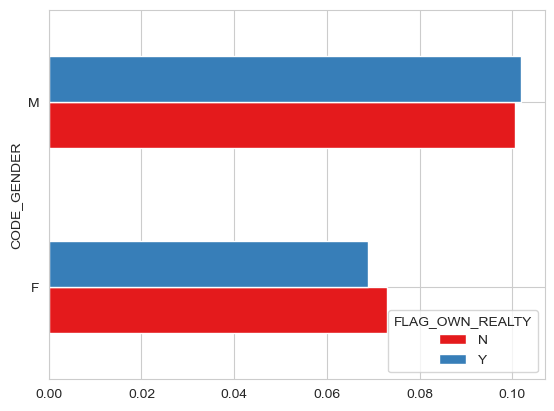

In [163]:
# Plotting a barplot to know deeper insight exactly who can pay the installments

pd.pivot_table(data=df, index= 'CODE_GENDER', columns='FLAG_OWN_REALTY', values='TARGET').plot.barh(color=sns.color_palette('Set1'))
plt.show()

## Insights
- We found that Female applicants either they have their own house or not, they are the soft targets for the loan products as they are more likely to pay installments on time.

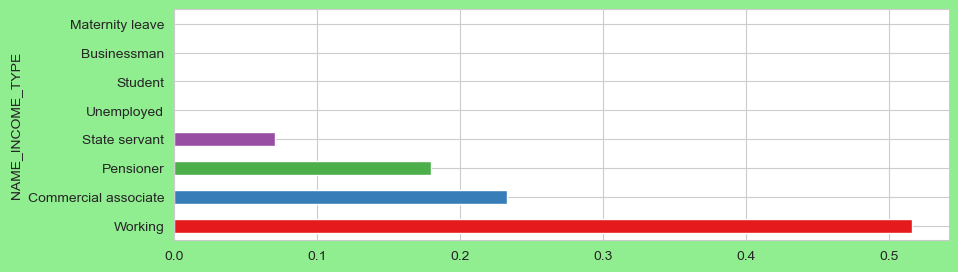

In [164]:
# Plotting a barplot to get insight that applicants having which different Income sources and interested in Loan products.

plt.figure(figsize=[10,3]).set_facecolor('lightgreen')
df['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))

plt.show()

## Insights
- As we can see that only Working people are interested in Loan products as they have regular income source as compared to other income sources.

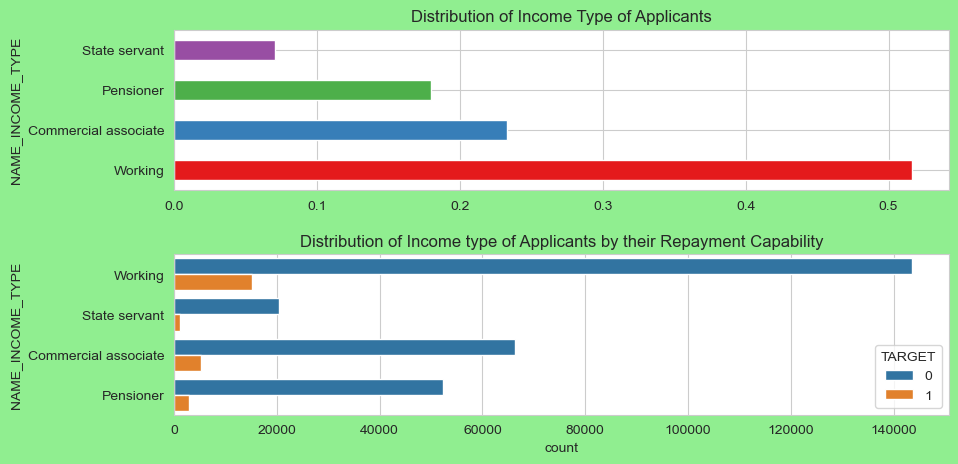

In [165]:
# Plotting 2 different barplots to get more insight about Income types and their repayment types.

a = df[df['NAME_INCOME_TYPE'].isin(['Working','State servant','Commercial associate','Pensioner'])]

plt.figure(figsize=[10,5]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
a['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))
plt.title('Distribution of Income Type of Applicants')

plt.subplot(2,1,2)
sns.countplot(y = a['NAME_INCOME_TYPE'], hue = a['TARGET'])
plt.title('Distribution of Income type of Applicants by their Repayment Capability')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Insights
- Working professionals are the soft targets for loan products as they have regular income source and they are more likely to repay the loan installments.

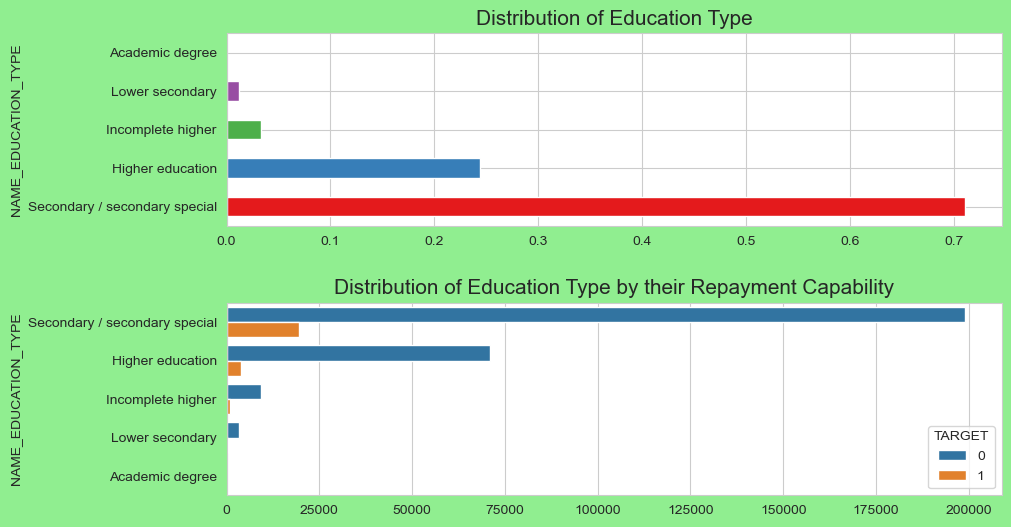

In [166]:
# Plotting 2 barplots to get insight about Applicants Education Type and their Repayment Capabilities.

plt.figure(figsize=[10,6]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))
plt.title('Distribution of Education Type', fontsize=15)
plt.xlabel('')

plt.subplot(2,1,2)
sns.countplot(y=df['NAME_EDUCATION_TYPE'], hue=df['TARGET'])
plt.title('Distribution of Education Type by their Repayment Capability', fontsize=15)
plt.xlabel('')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Insights
- In this barplots we found that applicants who done with their Secondary special education are highly interested in Loan products and they also have high repayment capabilities.

In [167]:
# Checking values counts of column NAME_FAMILY_STATUS

df['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196428
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

- We found that we have 2 count of Unknown, so our decision is to replace the 2 counts with 'Married'.

In [168]:
# Replacing the 'Unknown' values with 'Married' value.

df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown','Married')

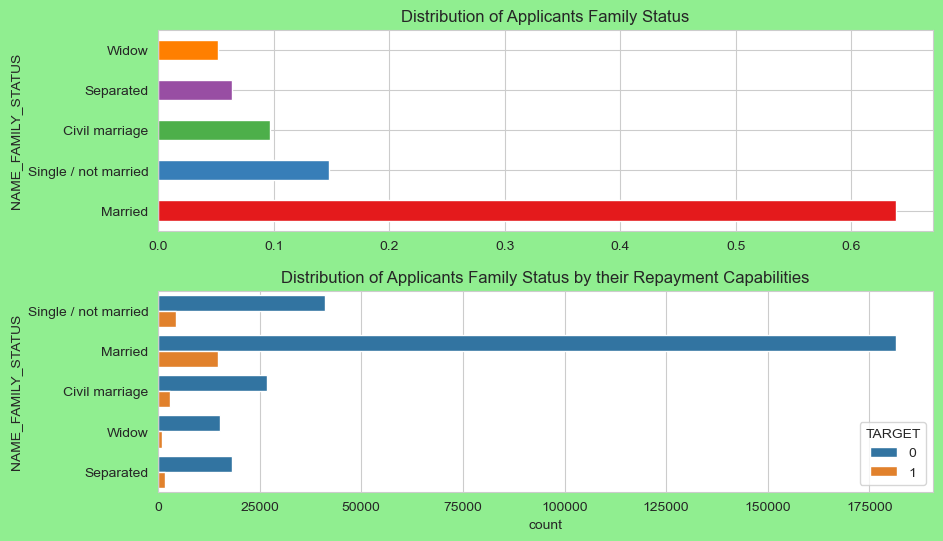

In [169]:
# Plotting 2 bar plots Distribution of Family Status by their repayment capabilities.

plt.figure(figsize=[10,6]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))
plt.title('Distribution of Applicants Family Status')

plt.subplot(2,1,2)
sns.countplot(y=df['NAME_FAMILY_STATUS'], hue=df['TARGET'])
plt.title('Distribution of Applicants Family Status by their Repayment Capabilities')

plt.subplots_adjust(hspace=0.3)
plt.show()

## Insights
- Those applicants who are married are highly interested in Loan application and also they have high repayment capabilities, they are soft targets.

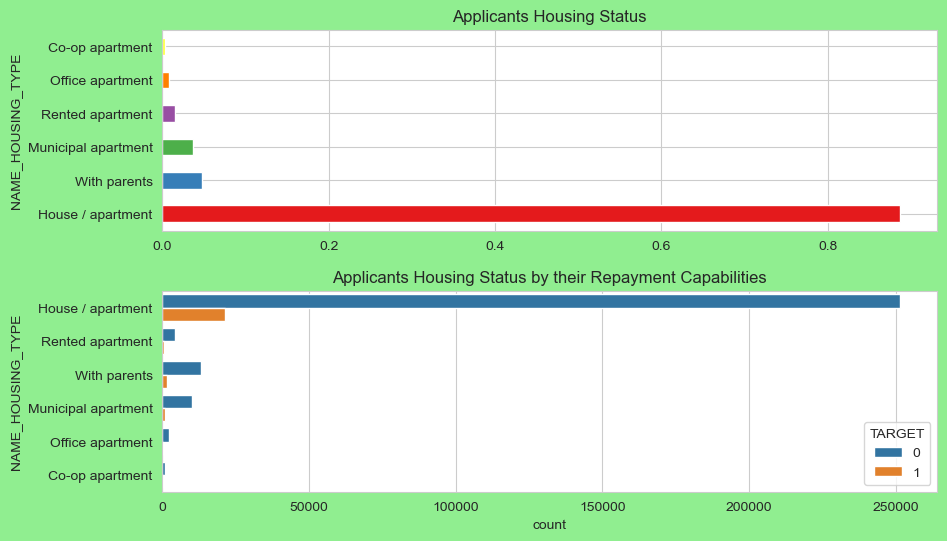

In [170]:
# Plotting 2 bar plots to get insights of Applicants Housing status by their Loan repayment capabilities.

plt.figure(figsize=[10,6]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))
plt.title('Applicants Housing Status')

plt.subplot(2,1,2)
sns.countplot(y=df['NAME_HOUSING_TYPE'], hue=df['TARGET'])
plt.title('Applicants Housing Status by their Repayment Capabilities')

plt.subplots_adjust(hspace=0.3)
plt.show()

## Insights 
- More than 80% applicants who have their own House or Flat are highly interested in Loan products and also they have high repayment capabilities, they become our soft targets.

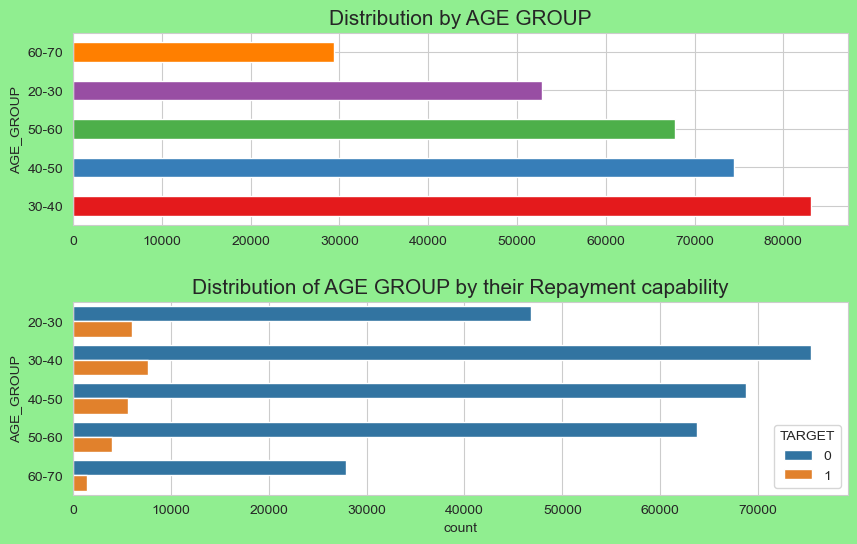

In [171]:
# Plotting AGE_GROUP to get the insights with their Loan repayment capability.

plt.figure(figsize=[10,6]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['AGE_GROUP'].value_counts().plot.barh(color=sns.color_palette('Set1'))
plt.title('Distribution by AGE GROUP', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(y=df['AGE_GROUP'], hue=df['TARGET'])
plt.title('Distribution of AGE GROUP by their Repayment capability', fontsize=15)

plt.subplots_adjust(hspace=0.4)
plt.show()

## Insights
- In the 1st barplot we found that Applicants whose age in between 30 to 60 are most interested in Loan facility.
- With the help of 2nd barplot we get confirmation that they are the most capable to repay the loan amount, they are soft targets.

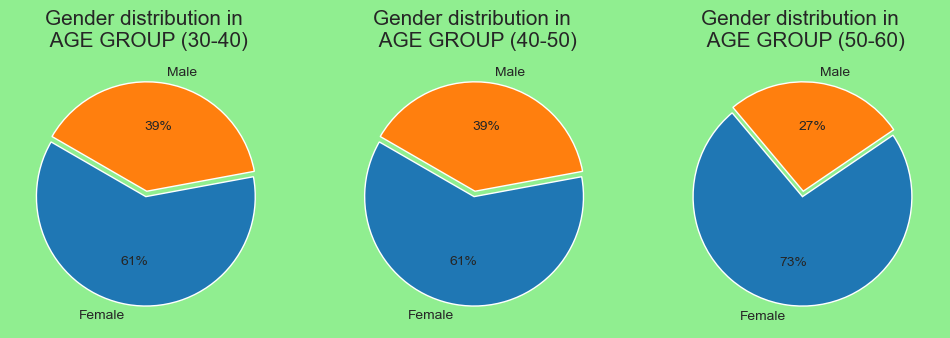

In [172]:
# Plotting the AGE_GROUP between 30-40, 40-50, 50-60 to get the more insight by their Gender

plt.figure(figsize=[12,5]).set_facecolor('lightgreen')

plt.subplot(1,3,1)
df[df['AGE_GROUP']=='30-40']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                   explode=[0.05,0],
                                                                    startangle=150,
                                                                   labels=['Female','Male'])
plt.title('Gender distribution in \n AGE GROUP (30-40)', fontsize=15)
plt.ylabel('')

plt.subplot(1,3,2)
df[df['AGE_GROUP']=='30-40']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                   explode=[0.05,0],
                                                                    startangle=150,
                                                                   labels=['Female','Male'])
plt.title('Gender distribution in \n AGE GROUP (40-50)', fontsize=15)
plt.ylabel('')

plt.subplot(1,3,3)
df[df['AGE_GROUP']=='50-60']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                   explode=[0.05,0],
                                                                    startangle=130,
                                                                   labels=['Female','Male'])
plt.title('Gender distribution in \n AGE GROUP (50-60)', fontsize=15)
plt.ylabel('')

plt.show()

## Insight
- This pie chart confirms that Females Age between 30 to 60 are very soft target for loan facility.

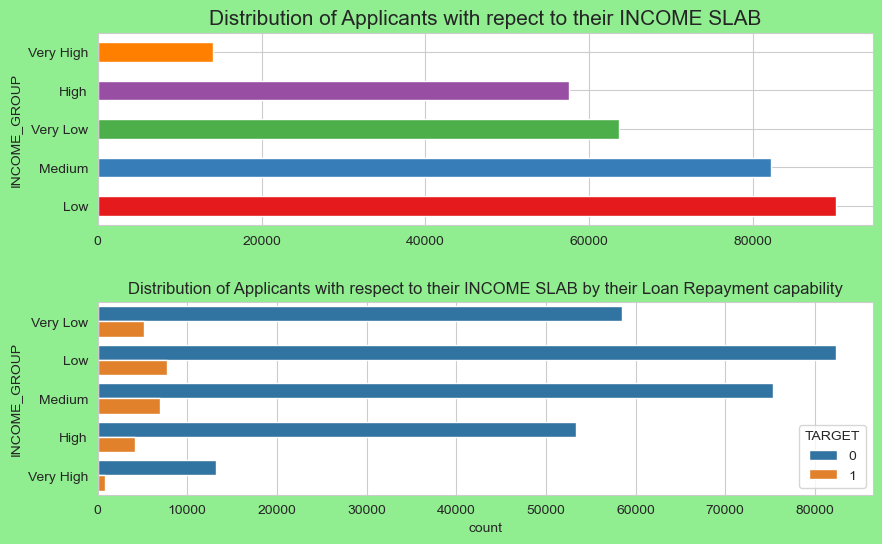

In [173]:
# Plotting barplot to get the insights with respect to their income slab.

plt.figure(figsize=[10,6]).set_facecolor('lightgreen')

plt.subplot(2,1,1)
df['INCOME_GROUP'].value_counts().plot.barh(color=sns.color_palette('Set1'))
plt.title('Distribution of Applicants with repect to their INCOME SLAB', fontsize=15)

plt.subplot(2,1,2)
sns.countplot(y=df['INCOME_GROUP'], hue=df['TARGET'])
plt.title('Distribution of Applicants with respect to their INCOME SLAB by their Loan Repayment capability')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Insights
- We found that those applicants who have Low and Medium Income are more likely to avail Loan facility and also they are able to pay the installments on time.
- Those applicants who have High or Very high Income are not so much interested in Loan products, they are not are soft targets.

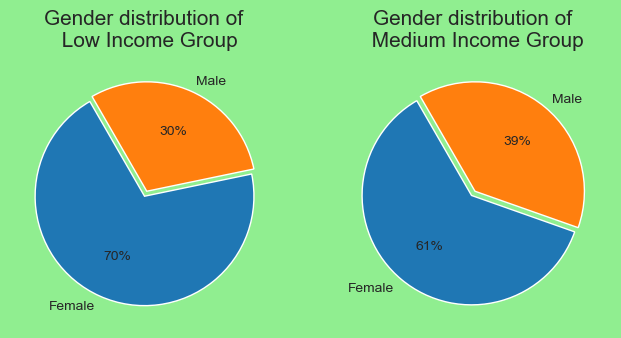

In [174]:
# Plotting the pie chart to get more insights in Low and Medium Income group.

plt.figure(figsize=[12,5]).set_facecolor('lightgreen')

plt.subplot(1,3,1)
df[df['INCOME_GROUP']=='Low']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                   explode=[0.05,0],
                                                                    startangle=120,
                                                                   labels=['Female','Male'])
plt.title('Gender distribution of \n Low Income Group', fontsize=15)
plt.ylabel('')

plt.subplot(1,3,2)
df[df['INCOME_GROUP']=='Medium']['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%',
                                                                   explode=[0.05,0],
                                                                    startangle=120,
                                                                   labels=['Female','Male'])
plt.title('Gender distribution of \n Medium Income Group', fontsize=15)
plt.ylabel('')

plt.show()

## Insights
- Those Female applicants who have Low and Medium Income are the soft targets for Loan products and they are more likey to repay the installments on time.

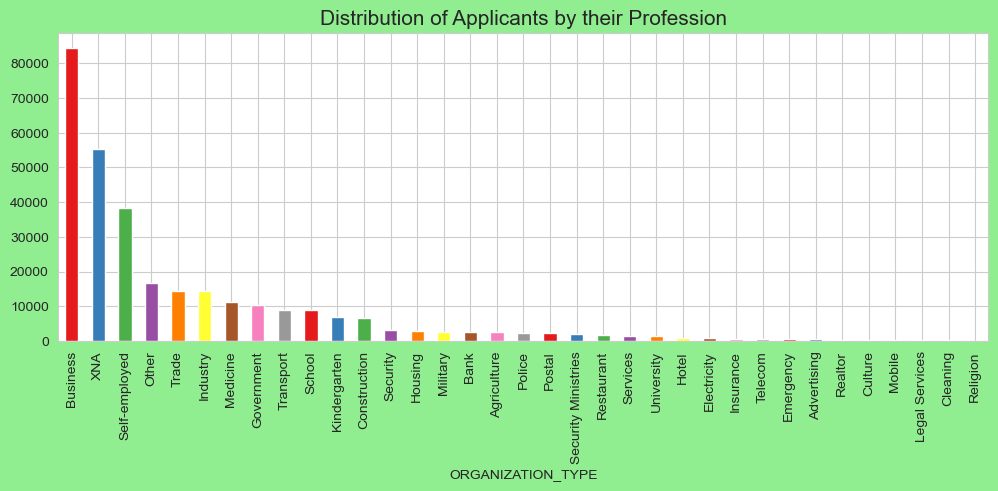

In [175]:
# Plotting bar plot to get the insights from Applicants Profession.

plt.figure(figsize=[12,4]).set_facecolor('lightgreen')

df['ORGANIZATION_TYPE'].value_counts().plot.bar(color=sns.color_palette('Set1'))
plt.title('Distribution of Applicants by their Profession', fontsize=15)

plt.show()

## Insights
- We found that Business, XNA and Self-employed people are more interested in Loan products as they need money to run their businesses. We should focus on Business and Self employed Professionals.

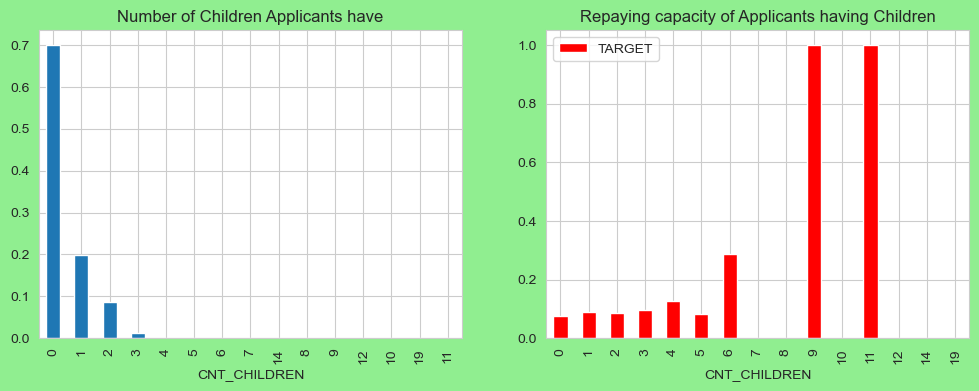

In [176]:
# Plotting 2 barplots to get insights about applicants childerns count.

plt.figure(figsize=[12,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df['CNT_CHILDREN'].value_counts(normalize=True).plot.bar()
plt.title('Number of Children Applicants have')

plt.subplot(1,2,2)
df.groupby(['CNT_CHILDREN'])['TARGET'].mean().plot.bar(color='red')
plt.title('Repaying capacity of Applicants having Children')
plt.legend()

plt.show()

## Insights
- 70% of the Applicants dont have childrens and they are very capable to repay the Loan.
- Those who have more than 5 childrens facing difficulties in repaying loan and may become defaulter.

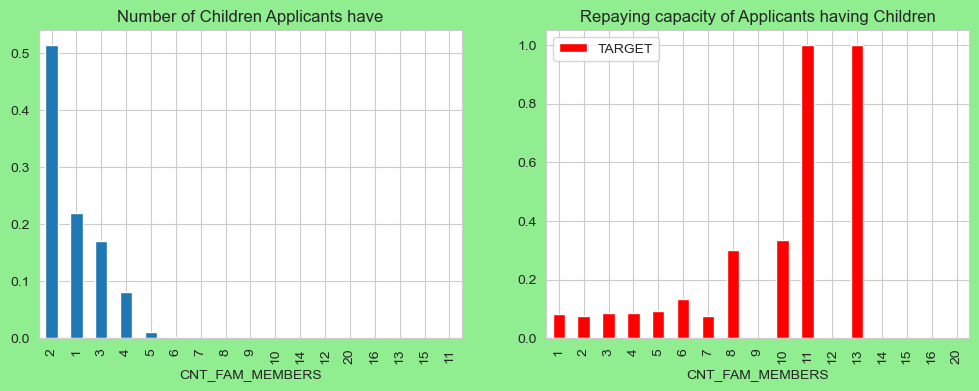

In [177]:
# Plotting 2 barplots to get insights about applicants Family count.

plt.figure(figsize=[12,4]).set_facecolor('lightgreen')

plt.subplot(1,2,1)
df['CNT_FAM_MEMBERS'].value_counts(normalize=True).plot.bar()
plt.title('Number of Children Applicants have')

plt.subplot(1,2,2)
df.groupby(['CNT_FAM_MEMBERS'])['TARGET'].mean().plot.bar(color='red')
plt.title('Repaying capacity of Applicants having Children')
plt.legend()

plt.show()

## Insights
- Applicants who have family count of 2 are highly interested in Loan and they are very capable to repay the Loan.
- Applicants who have family count more than 3 are not so much interested in Loan and also they are facing difficulties in repaying loan and may become defaulter.

===============================================================================================================
- Now we are trying to get insights with respect credit enquiries.

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

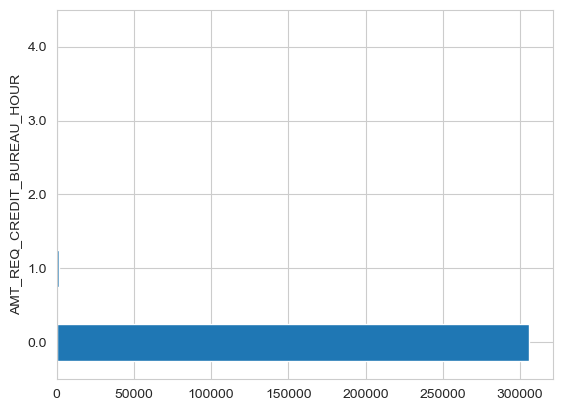

In [178]:
# Plotting barplot for Applicants hourly credit enquiry.

df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().plot.barh()

- We found that we have many types of credit enquiry like hourly, daily, weekly, monthly, quarterly, yearly.
- It is difficult to get insight if we analyze them one by one and it also took so much time.
- Our decision is to plot all the enquiry in one barplot to get insights.

==========================================================================================================
- We are doing enquiry analysis in step by step procedure.

In [179]:
# Creating a data by grouping TARGET variable.

df.groupby(['TARGET'])[['AMT_REQ_CREDIT_BUREAU_HOUR', 
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT', 
                        'AMT_REQ_CREDIT_BUREAU_YEAR']].max()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,4.0,9.0,8.0,27.0,261.0,25.0
1,2.0,4.0,6.0,17.0,19.0,22.0


- Now we have maximum values of all the enquiries with Index TARGET variable, Now if we transpose them the column becomes TARGET variable and Index becomes all the enquiries.

In [180]:
# Trying to do the operation of Transposing

df.groupby(['TARGET'])[['AMT_REQ_CREDIT_BUREAU_HOUR', 
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT', 
                        'AMT_REQ_CREDIT_BUREAU_YEAR']].max().T

TARGET,0,1
AMT_REQ_CREDIT_BUREAU_HOUR,4.0,2.0
AMT_REQ_CREDIT_BUREAU_DAY,9.0,4.0
AMT_REQ_CREDIT_BUREAU_WEEK,8.0,6.0
AMT_REQ_CREDIT_BUREAU_MON,27.0,17.0
AMT_REQ_CREDIT_BUREAU_QRT,261.0,19.0
AMT_REQ_CREDIT_BUREAU_YEAR,25.0,22.0


- Now our next step is to just plot them in a barplot to get insights.

<Axes: >

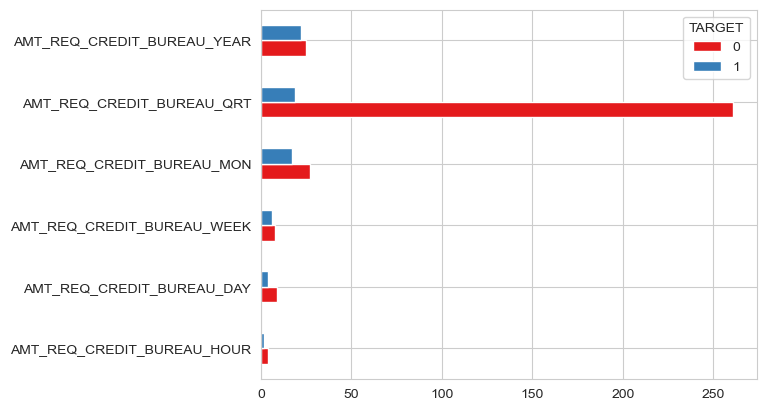

In [181]:
df.groupby(['TARGET'])[['AMT_REQ_CREDIT_BUREAU_HOUR', 
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT', 
                        'AMT_REQ_CREDIT_BUREAU_YEAR']].max().T.plot.barh(color=sns.color_palette('Set1'))

## Insights
- By plotting all the credit enquiries in one bar plot we found that we have maximum applications from applicants who have enquired since last 3 months.

# Finding top 10 correlation

### For Loan Payers

In [182]:
df_target_0 = df[df['TARGET']==0]

In [183]:
df_target_1 = df[df['TARGET']==1]

In [184]:
correlation_0 = df_target_0.describe().corr().abs().unstack().sort_values().dropna()

In [185]:
correlation_0 = correlation_0[correlation_0 != 1.0]

In [186]:
# Top 10 correlation for Loan Payers

correlation_0.head(10)

TARGET                      SK_ID_CURR                    0.084669
SK_ID_CURR                  TARGET                        0.084669
REGION_POPULATION_RELATIVE  SK_ID_CURR                    0.084669
SK_ID_CURR                  REGION_POPULATION_RELATIVE    0.084669
                            REG_CITY_NOT_WORK_CITY        0.084671
REG_CITY_NOT_WORK_CITY      SK_ID_CURR                    0.084671
SK_ID_CURR                  FLAG_WORK_PHONE               0.084671
FLAG_WORK_PHONE             SK_ID_CURR                    0.084671
SK_ID_CURR                  LIVE_CITY_NOT_WORK_CITY       0.084671
LIVE_CITY_NOT_WORK_CITY     SK_ID_CURR                    0.084671
dtype: float64

### For Defaulters

In [187]:
correlation_1 = df_target_1.describe().corr().abs().unstack().sort_values().dropna()

In [188]:
correlation_1 = correlation_1[correlation_1 != 1.0]

In [189]:
# Top 10 correlation for Defaulters.

correlation_1.head(10)

EMPLOYED_YEAR             AMT_ANNUITY                 0.064808
AMT_ANNUITY               EMPLOYED_YEAR               0.064808
                          REGISTRATION_YEAR           0.098411
REGISTRATION_YEAR         AMT_ANNUITY                 0.098411
AGE                       AMT_ANNUITY                 0.098950
AMT_ANNUITY               AGE                         0.098950
                          OBS_30_CNT_SOCIAL_CIRCLE    0.099448
OBS_30_CNT_SOCIAL_CIRCLE  AMT_ANNUITY                 0.099448
AMT_ANNUITY               OBS_60_CNT_SOCIAL_CIRCLE    0.099487
OBS_60_CNT_SOCIAL_CIRCLE  AMT_ANNUITY                 0.099487
dtype: float64

## Now we took previous application dataset to analyze

In [190]:
# importing csv file to jupyter notebook

df_1 = pd.read_csv('previous_application.csv')
df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
# Checking shape of dataframe

df_1.shape

(1670214, 37)

In [192]:
# Fetching 50% value of total dataframe

df_1.shape[0]*50/100

835107.0

In [193]:
# Fetching null value column in a dataframe

df_1.isnull().sum().sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [194]:
# Fetching column names who have missing values more than 50%.

df_1.columns[df_1.isnull().sum() > df_1.shape[0]*50/100]

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [195]:
# Extracting dataframe with column only which have null values more than 50%.

df_1.loc[:, df_1.isnull().sum() > df_1.shape[0]*50/100]

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED
0,0.0,0.000000,0.182832,0.867336
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
1670209,0.0,0.000000,NaN,NaN
1670210,29250.0,0.340554,NaN,NaN
1670211,10525.5,0.101401,NaN,NaN
1670212,NaN,NaN,NaN,NaN


In [196]:
# Droping the columns who have more than 50% null values.

df_1.drop(columns = df_1.columns[df_1.isnull().sum() > df_1.shape[0]*50/100], inplace=True)

In [197]:
# Checking dataframe with head function.

df_1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
# Fetching null value column names only.

df_1.columns[df_1.isnull().sum() > 0]

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [199]:
# First we took AMT_ANNUITY column for for operation.

df_1['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

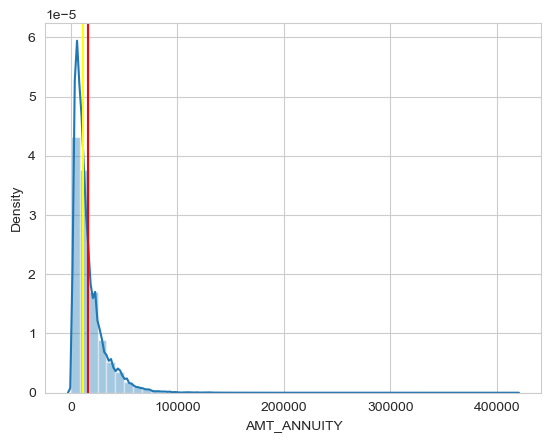

In [200]:
# Plotting distplot to know the value distribution in a particular column.

sns.set_style('whitegrid')
sns.distplot(df_1['AMT_ANNUITY'])
plt.axvline(df_1['AMT_ANNUITY'].mean(), color='red')
plt.axvline(df_1['AMT_ANNUITY'].median(), color='yellow')
plt.show()

In [201]:
# Checking skewness of column

df_1['AMT_ANNUITY'].skew()

2.6925715126729455

In [202]:
# Accroding to the rule our decision is to fill null values with median.

df_1['AMT_ANNUITY'].fillna(df_1['AMT_ANNUITY'].median(), inplace=True)

In [203]:
# Checking null values.

df_1['AMT_CREDIT'].isnull().sum()

1

In [204]:
# Now we took AMT_CREDIT column for operation.

df_1['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [205]:
# dropping the null value rows from a dataframe.

df_1 = df_1[~df_1['AMT_CREDIT'].isnull()]

In [206]:
# Now we took AMT_GOODS_PRICE column for operation.

df_1['AMT_GOODS_PRICE'].isnull().sum()

385514

In [207]:
# Checking column with describe function.

df_1['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

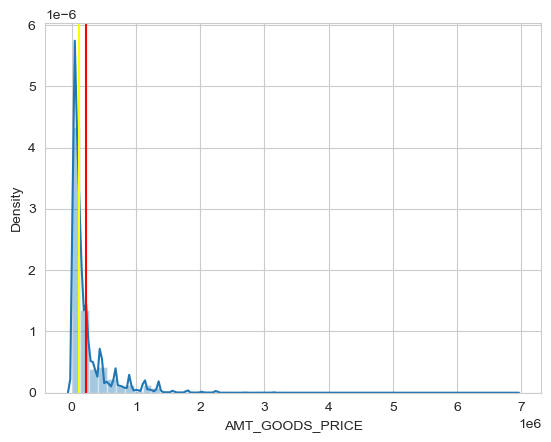

In [208]:
# Plotting distplot to know the value distribution in a particular column.

sns.distplot(df_1['AMT_GOODS_PRICE'])
plt.axvline(df_1['AMT_GOODS_PRICE'].mean(), color='red')
plt.axvline(df_1['AMT_GOODS_PRICE'].median(), color='yellow')

In [209]:
# Checking skeweness value of column.

df_1['AMT_GOODS_PRICE'].skew()

3.0736896781923937

In [210]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['AMT_GOODS_PRICE'].fillna(df_1['AMT_GOODS_PRICE'].median(), inplace=True)

In [211]:
# Now we took NAME_TYPE_SUITE for operation and checking null values.

df_1['NAME_TYPE_SUITE'].isnull().sum()

820404

In [212]:
# Checking column with describe function.

df_1['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      59.892282
Family             25.095404
Spouse, partner     7.892244
Children            3.714482
Other_B             2.073878
Other_A             1.068122
Group of people     0.263589
Name: proportion, dtype: float64

In [213]:
# Fetching value with mode function.

df_1['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [214]:
# According to the rule our decision is to fill the null values with mode function.

df_1['NAME_TYPE_SUITE'].fillna(df_1['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [215]:
# Now checking what changes happened in a dataframe after filling the value.

df_1['NAME_TYPE_SUITE'].value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      79.593082
Family             12.768611
Spouse, partner     4.015596
Children            1.889939
Other_B             1.055195
Other_A             0.543464
Group of people     0.134115
Name: proportion, dtype: float64

In [216]:
# Now we took CNT_PAYMENT column for operation and checking null values.

df_1['CNT_PAYMENT'].isnull().sum()

372230

In [217]:
# Fetching null value percentage.

df_1['CNT_PAYMENT'].isnull().sum() / df_1.shape[0] * 100

22.286379042672998

In [218]:
# Checking column with describe function.

df_1['CNT_PAYMENT'].describe()

count    1.297983e+06
mean     1.605409e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [219]:
# Checking skeweness of the column.

df_1['CNT_PAYMENT'].skew()

1.531403025921332

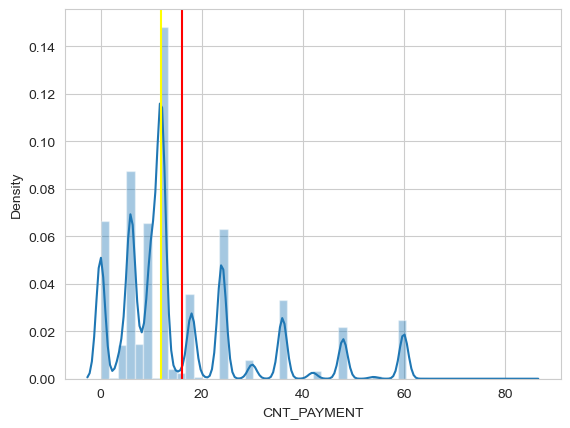

In [220]:
# Plotting distplot to know the value distribution in a particular column.

sns.distplot(df_1['CNT_PAYMENT'])
plt.axvline(df_1['CNT_PAYMENT'].mean(), color='red')
plt.axvline(df_1['CNT_PAYMENT'].median(), color='yellow')
plt.show()

In [221]:
# According to the rule our decision is to fill the null values with median value.

df_1['CNT_PAYMENT'].fillna(df_1['CNT_PAYMENT'].median(), inplace=True)

In [222]:
# Now again checking.

df_1['CNT_PAYMENT'].describe()

count    1.670213e+06
mean     1.515058e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [223]:
# Now we took PRODUCT_COMBINATION column for operation and checking null values.

df_1['PRODUCT_COMBINATION'].isnull().sum()

346

In [224]:
# Fetching value counts of a column

df_1['PRODUCT_COMBINATION'].value_counts(normalize=True)*100

PRODUCT_COMBINATION
Cash                              17.126514
POS household with interest       15.787006
POS mobile with interest          13.214825
Cash X-Sell: middle                8.616435
Cash X-Sell: low                   7.799903
Card Street                        6.741914
POS industry with interest         5.918615
POS household without interest     4.964946
Card X-Sell                        4.825654
Cash Street: high                  3.571482
Cash X-Sell: high                  3.551241
Cash Street: middle                2.075495
Cash Street: low                   2.026149
POS mobile without interest        1.442151
POS other with interest            1.429994
POS industry without interest      0.754671
POS others without interest        0.153006
Name: proportion, dtype: float64

<Axes: ylabel='PRODUCT_COMBINATION'>

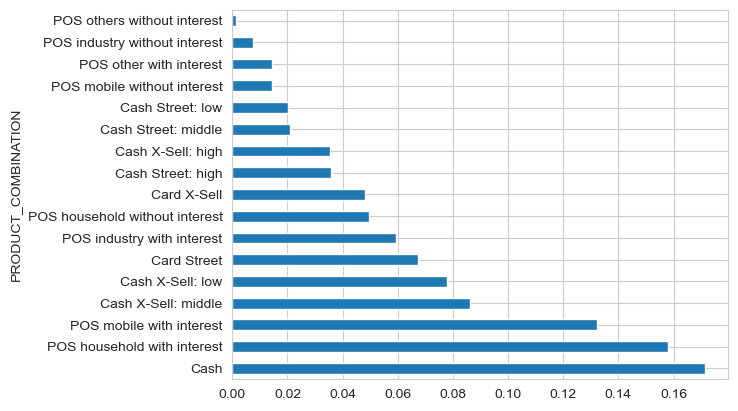

In [225]:
# Plot bar plot to know the distribution of value in a dataframe.

df_1['PRODUCT_COMBINATION'].value_counts(normalize=True).plot.barh()

In [226]:
# Accroding to the rule our decision is to fill the null values with mode function.

df_1['PRODUCT_COMBINATION'].fillna(df_1['PRODUCT_COMBINATION'].mode()[0], inplace=True)

<Axes: ylabel='PRODUCT_COMBINATION'>

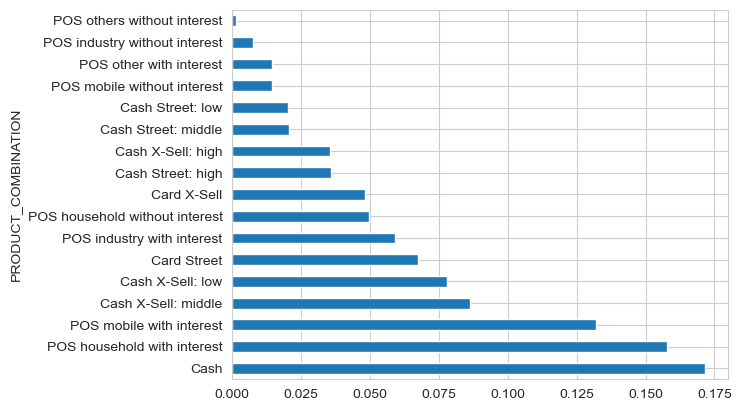

In [227]:
# Again checking distribution of values after filling null values.

df_1['PRODUCT_COMBINATION'].value_counts(normalize=True).plot.barh()

In [228]:
# Now we took DAYS_FIRST_DRAWING column for operation and checking null values.

df_1['DAYS_FIRST_DRAWING'].isnull().sum()

673064

In [229]:
# Fetching percentage of null values in a column.

df_1['DAYS_FIRST_DRAWING'].isnull().sum() / df_1.shape[0] * 100

40.29809371619069

In [230]:
# Checking column with describe function.

df_1['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

<Axes: xlabel='DAYS_FIRST_DRAWING', ylabel='Density'>

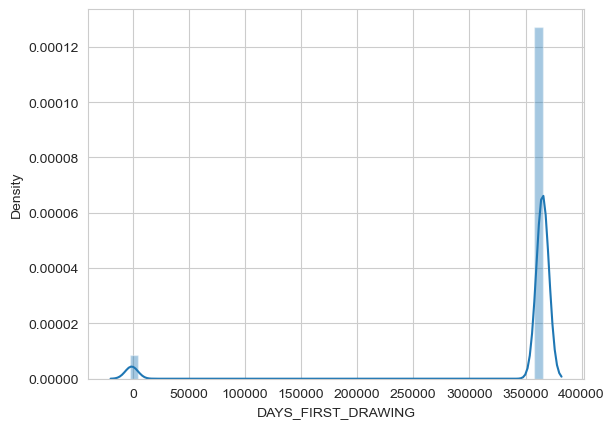

In [231]:
# Plot distplot to know the value distribution in a column.

sns.distplot(df_1['DAYS_FIRST_DRAWING'])

In [232]:
# Checking skeweness of a column.

df_1['DAYS_FIRST_DRAWING'].skew()

-3.6013427528524034

In [233]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['DAYS_FIRST_DRAWING'].fillna(df_1['DAYS_FIRST_DRAWING'].median(), inplace=True)

In [234]:
# Now we took DAYS_FIRST_DUE column for operation and fetching null values.

df_1['DAYS_FIRST_DUE'].isnull().sum()

673064

In [235]:
# Checking column with describe function.

df_1['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [236]:
# Checking skeweness

df_1['DAYS_FIRST_DUE'].skew()

4.644095917350341

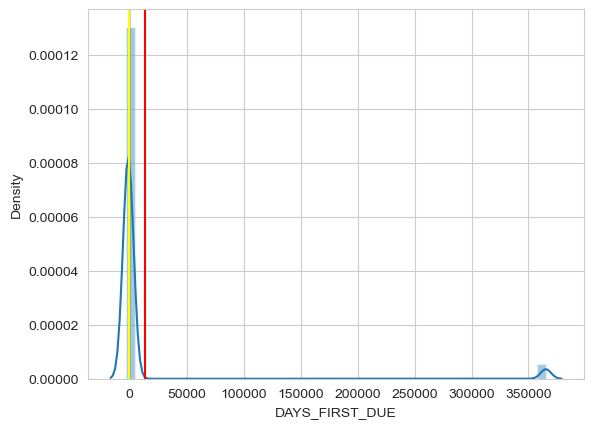

In [237]:
# Plotting distplot to know the value distribution in a column.

sns.distplot(df_1['DAYS_FIRST_DUE'])
plt.axvline(df_1['DAYS_FIRST_DUE'].mean(),color='red')
plt.axvline(df_1['DAYS_FIRST_DUE'].median(), color='yellow')
plt.show()

In [238]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['DAYS_FIRST_DUE'].fillna(df_1['DAYS_FIRST_DUE'].median(), inplace=True)

In [239]:
# Now we took DAYS_LAST_DUE_1ST_VERSION column.

df_1['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [240]:
# Checking skeweness

df_1['DAYS_LAST_DUE_1ST_VERSION'].skew()

2.779449898326863

In [241]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['DAYS_LAST_DUE_1ST_VERSION'].fillna(df_1['DAYS_LAST_DUE_1ST_VERSION'].median(), inplace=True)

In [242]:
# Checking DAYS_LAST_DUE_1ST_VERSION column.

df_1['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    1.670213e+06
mean     2.001453e+04
std      8.424515e+04
min     -2.801000e+03
25%     -5.800000e+02
50%     -3.610000e+02
75%     -1.870000e+02
max      3.652430e+05
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [243]:
# Checking DAYS_LAST_DUE column

df_1['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [244]:
# Checking skeweness

df_1['DAYS_LAST_DUE'].skew()

1.4104726031425765

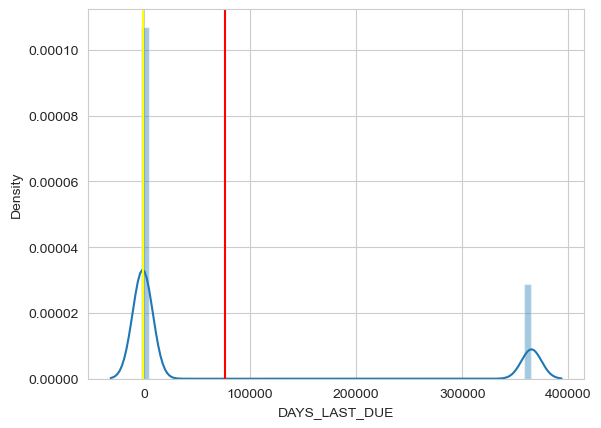

In [245]:
# Plotting distplot to know the value distribution in a column.

sns.distplot(df_1['DAYS_LAST_DUE'])
plt.axvline(df_1['DAYS_LAST_DUE'].mean(),color='red')
plt.axvline(df_1['DAYS_LAST_DUE'].median(),color='yellow')
plt.show()

In [246]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['DAYS_LAST_DUE'].fillna(df_1['DAYS_LAST_DUE'].median(), inplace=True)

In [247]:
df_1['DAYS_LAST_DUE'].describe()

count    1.670213e+06
mean     4.550475e+04
std      1.216582e+05
min     -2.889000e+03
25%     -7.340000e+02
50%     -5.370000e+02
75%     -3.710000e+02
max      3.652430e+05
Name: DAYS_LAST_DUE, dtype: float64

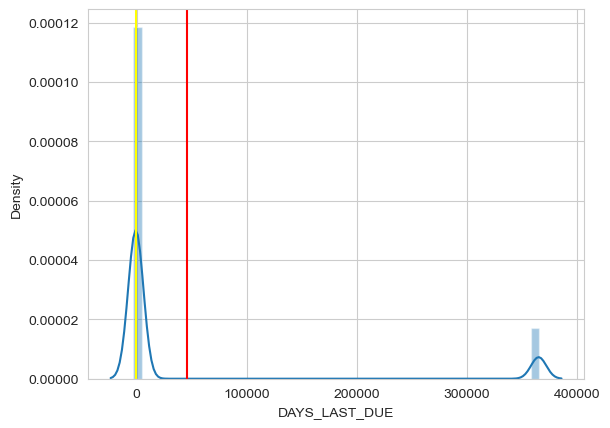

In [248]:
sns.distplot(df_1['DAYS_LAST_DUE'])
plt.axvline(df_1['DAYS_LAST_DUE'].mean(),color='red')
plt.axvline(df_1['DAYS_LAST_DUE'].median(),color='yellow')
plt.show()

In [249]:
# Checking DAYS_TERMINATION column

df_1['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [250]:
# Checking skeweness

df_1['DAYS_TERMINATION'].skew()

1.3063759944549813

In [251]:
# Accroding to the rule our decision is to fill the null values with median value.

df_1['DAYS_TERMINATION'].fillna(df_1['DAYS_TERMINATION'].median(), inplace=True)

In [252]:
# Fetching null values from a column

df_1['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673064

In [253]:
# Checking column with describe function.

df_1['NFLAG_INSURED_ON_APPROVAL'].describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [254]:
# Checking skeweness

df_1['NFLAG_INSURED_ON_APPROVAL'].skew()

0.7107536014428986

In [255]:
# Fetching value counts of a column

df_1['NFLAG_INSURED_ON_APPROVAL'].value_counts(normalize=True)*100

NFLAG_INSURED_ON_APPROVAL
0.0    66.742984
1.0    33.257016
Name: proportion, dtype: float64

In [256]:
# Accroding to the rule our decision is to fill the null values with mode value.

df_1['NFLAG_INSURED_ON_APPROVAL'].fillna(df_1['NFLAG_INSURED_ON_APPROVAL'].mode()[0], inplace=True)

In [257]:
# Checking is there any null value remaining or not

df_1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE_1ST_VERSION      0
DAYS_LAST_

In [258]:
# Merge 2 dataframes 'application_data' and 'previous application' with inner function to keep only common values.

merge_df = df.merge(df_1, on='SK_ID_CURR', how='inner')

In [259]:
# Fetching column names of merge datafrane.

merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CN

In [260]:
# Checking info

merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413645 entries, 0 to 1413644
Data columns (total 87 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413645 non-null  int64   
 1   TARGET                        1413645 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413645 non-null  object  
 3   CODE_GENDER                   1413645 non-null  object  
 4   FLAG_OWN_CAR                  1413645 non-null  object  
 5   FLAG_OWN_REALTY               1413645 non-null  object  
 6   CNT_CHILDREN                  1413645 non-null  int64   
 7   AMT_INCOME_TOTAL              1413645 non-null  float64 
 8   AMT_CREDIT_x                  1413645 non-null  float64 
 9   AMT_ANNUITY_x                 1413645 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413645 non-null  float64 
 11  NAME_TYPE_SUITE_x             1413645 non-null  object  
 12  NAME_INCOME_TY

In [261]:
# Separating categorical column from dataframe

categorical_columns_df_1 = list(merge_df.select_dtypes(include=['object']).columns)

In [262]:
# Separating numerical_column from dataframe

numerical_columns_df_1 = list(merge_df.select_dtypes(include=['int64','float64']).columns)

In [263]:
# Fetching categorical column 

categorical_columns_df_1

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE_x',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START_x',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE_y',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [264]:
# Fetching the dataframe only target variable = 0
mergedf_target_0 = merge_df[merge_df['TARGET']==0]

# Fetching the dataframe only target variable = 1
mergedf_target_1 = merge_df[merge_df['TARGET']==1]

In [265]:
# Checking value counts

merge_df['TARGET'].value_counts()

TARGET
0    1291286
1     122359
Name: count, dtype: int64

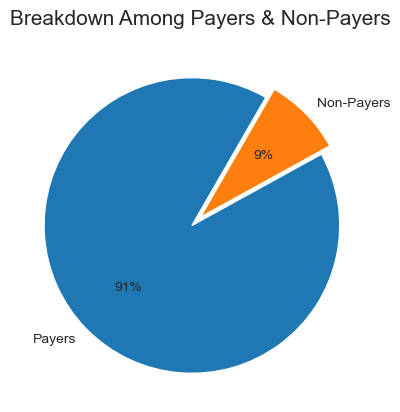

In [266]:
# Plotting pie chart to find how many percentage of Payers & Non-Payers we have in the merge_df.

merge_df['TARGET'].value_counts(normalize=True).plot.pie(autopct='%.0f%%',
                                                   explode=[0.08,0], 
                                                   startangle= 60, 
                                                   labels=['Payers','Non-Payers'])
plt.title('Breakdown Among Payers & Non-Payers', fontsize=15)
plt.ylabel('')
plt.show()

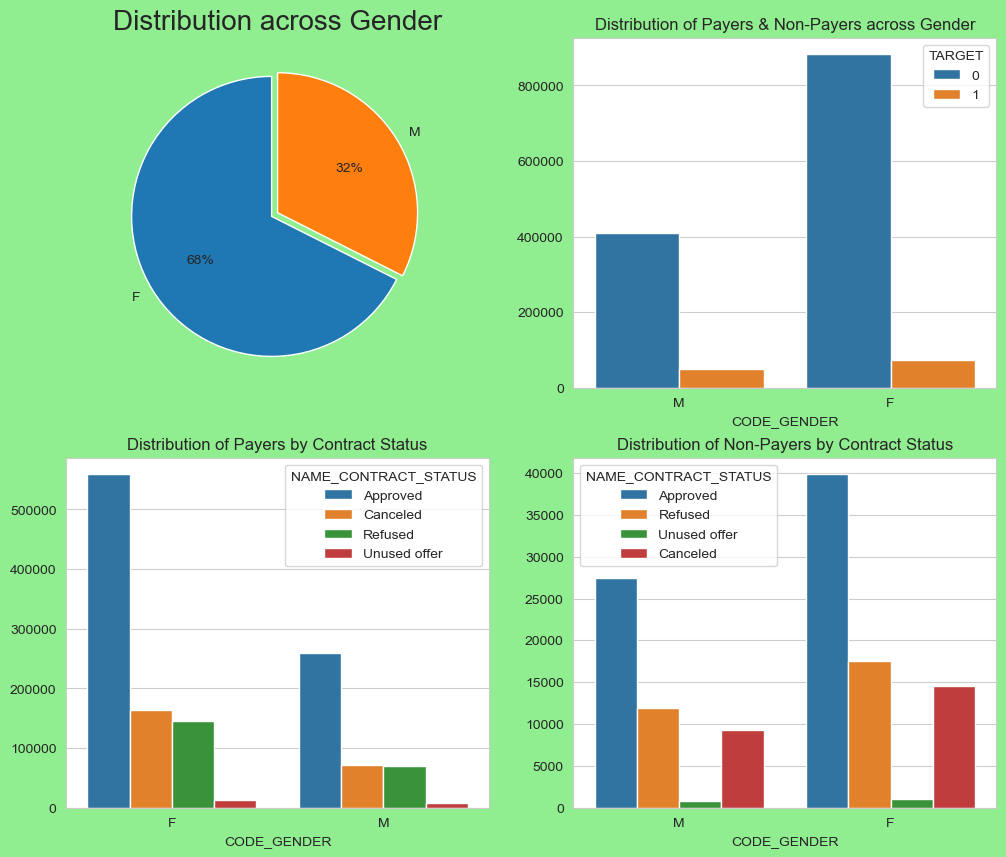

In [267]:
# Plotting both pie chart & bar graph to move forward my analysis.

plt.figure(figsize=[12,10]).set_facecolor('lightgreen')

plt.subplot(2,2,1)
merge_df['CODE_GENDER'].value_counts().plot.pie(autopct='%.0f%%', 
                                          explode=[0.05,0], 
                                          startangle=90)
                                          
                                          
plt.title('Distribution across Gender', fontsize=20)
plt.ylabel('')

plt.subplot(2,2,2)
sns.countplot(x=merge_df['CODE_GENDER'], hue=merge_df['TARGET'])
plt.title('Distribution of Payers & Non-Payers across Gender')
plt.ylabel('')

plt.subplot(2,2,3)
sns.countplot(x=mergedf_target_0['CODE_GENDER'], hue=mergedf_target_0['NAME_CONTRACT_STATUS'])
plt.title('Distribution of Payers by Contract Status')
plt.ylabel('')

plt.subplot(2,2,4)
sns.countplot(x=mergedf_target_1['CODE_GENDER'], hue=mergedf_target_1['NAME_CONTRACT_STATUS'])
plt.title('Distribution of Non-Payers by Contract Status')
plt.ylabel('')

plt.show()   

## Insights
- Female applicants lead the stats, as we found that Female applicants has the highest number of Loan payers.
- Female applicants loan application was approved in both the cases because they contributed very less percentage of Non-paying of installments.

In [268]:
# Defining function to get stats from different parameters.

def stat(column, hue):
    column = column
    hue = hue

    plt.figure(figsize=[12,10]).set_facecolor('lightgreen')

    plt.subplot(2,2,1)
    merge_df[column].value_counts().plot.pie(autopct='%.0f%%',                                               
                                              startangle=90)                                               

    plt.title('Distribution across \n{}'.format(column), fontsize=16)
    plt.ylabel('')

    plt.subplot(2,2,2)
    sns.countplot(x=merge_df[column], hue=merge_df['TARGET'])
    plt.title('Distribution of Payers & Non-Payers across \n{}'.format(column))
    plt.ylabel('')

    plt.subplot(2,2,3)
    sns.countplot(x=mergedf_target_0[column], hue=mergedf_target_0[hue])
    plt.title('Distribution of Payers by {}'.format(hue))
    plt.ylabel('')

    plt.subplot(2,2,4)
    sns.countplot(x=mergedf_target_1[column], hue=mergedf_target_1[hue])
    plt.title('Distribution of Non-Payers by {}'.format(hue))
    plt.ylabel('')

    plt.show()   

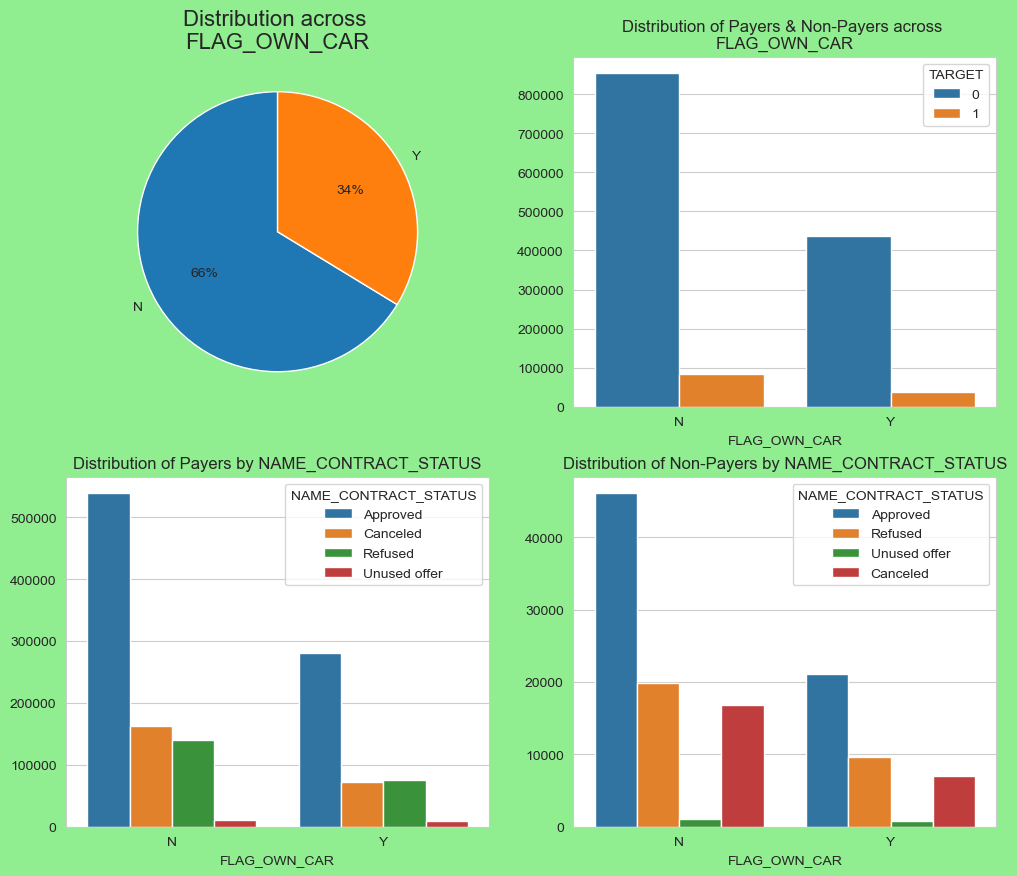

In [269]:
# Plotting different plots to get the insight of applicants who have cars or dont have cars with respect to their contract status.

stat('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

## Insights
- Applicants who dont have car are the ones who pay the installments on time and repay the loan amount on time.
- Applicants who dont have car their loan applications was approved as we found with our analysis that they can repay the loan amount on time.

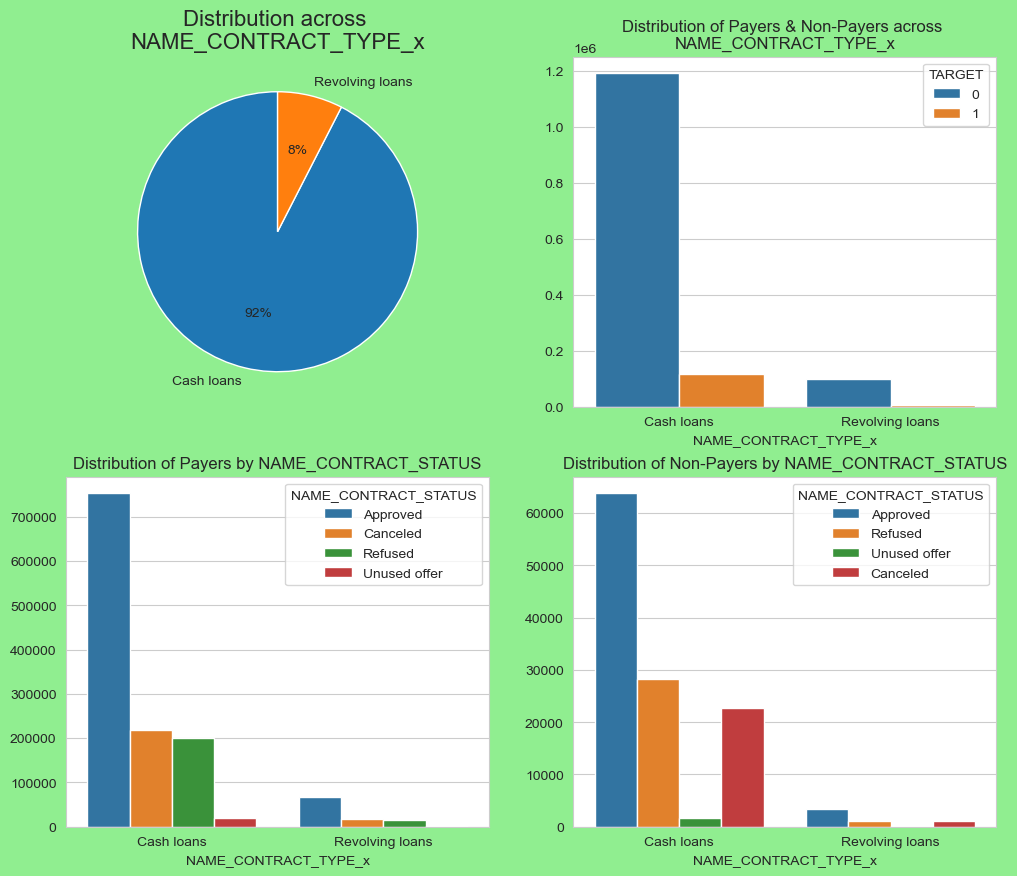

In [270]:
# Plotting different plots to get the insight of applicants across different Contract types with respect to their contract status.

stat('NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS')

## Insights
- We found that applicants are more interested in cash loans as they need cash.
- Applicants who applied for cash loans their loan was approved as they are liable to pay the installments on time.

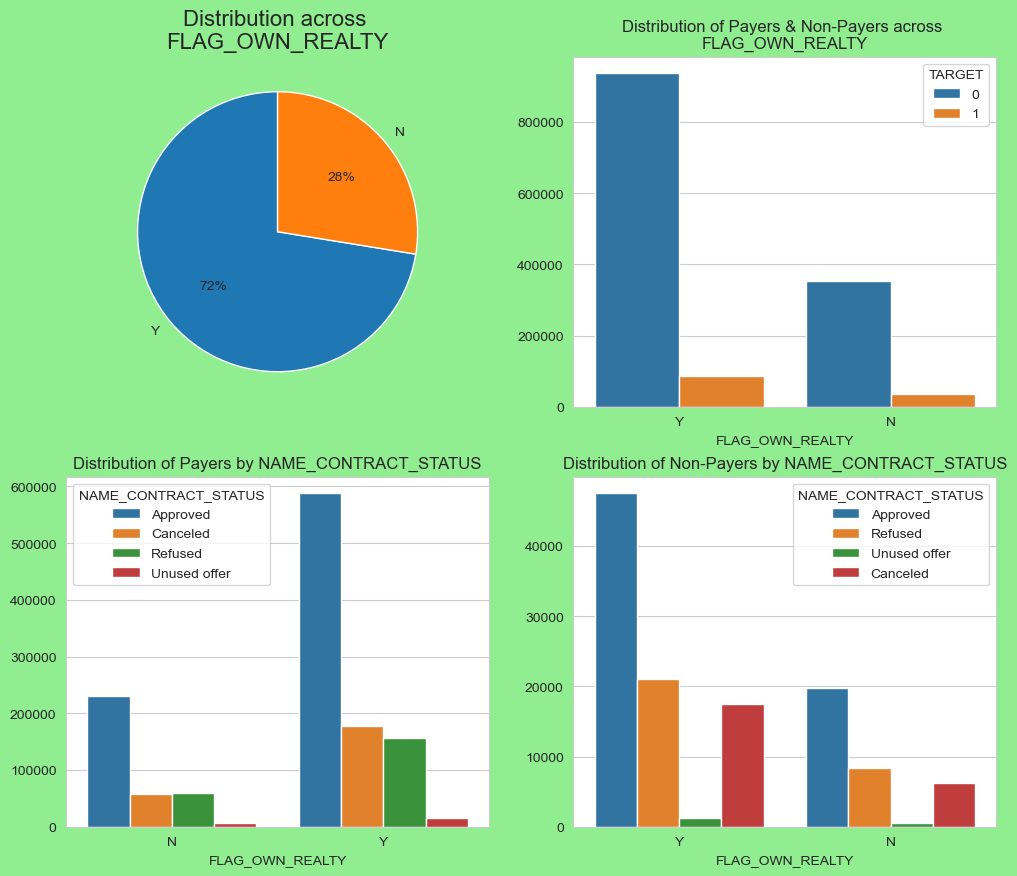

In [271]:
# Plotting different plots to get the insight of applicants who have house or living in rented property with respect to their contract status.

stat('FLAG_OWN_REALTY','NAME_CONTRACT_STATUS')

## Insights
- Applicants who have their own property are more likey to avail loan facility and they more liable to pay installments on time.
- Applicants who have their own house or flat their loan was approved as they are liable to pay installments on time.

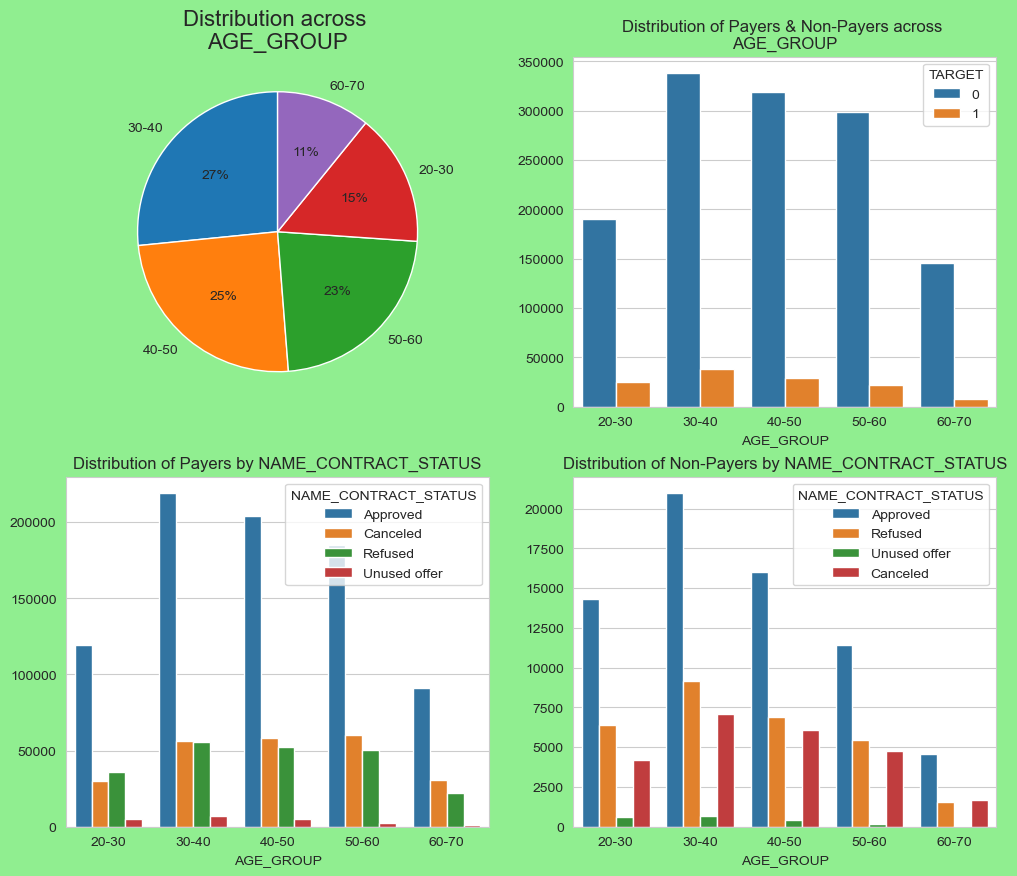

In [272]:
# Plotting different plots to get the insight of applicants of different Age Groups with respect to their contract status.

stat('AGE_GROUP','NAME_CONTRACT_STATUS')

## Insights
- We found that applicants age between 30 to 60 are interested in Loan facility and their loan repayment history is also good.
- In the loan payers group we found that applicants their age between 30 to 60 their loan application was approved.
- But In the Loan Non-Payers group age between 20-30 we approved their loans also as compared to age group between 50-60, some of the applicants loan age between 20-30 might be at high risk to become default.

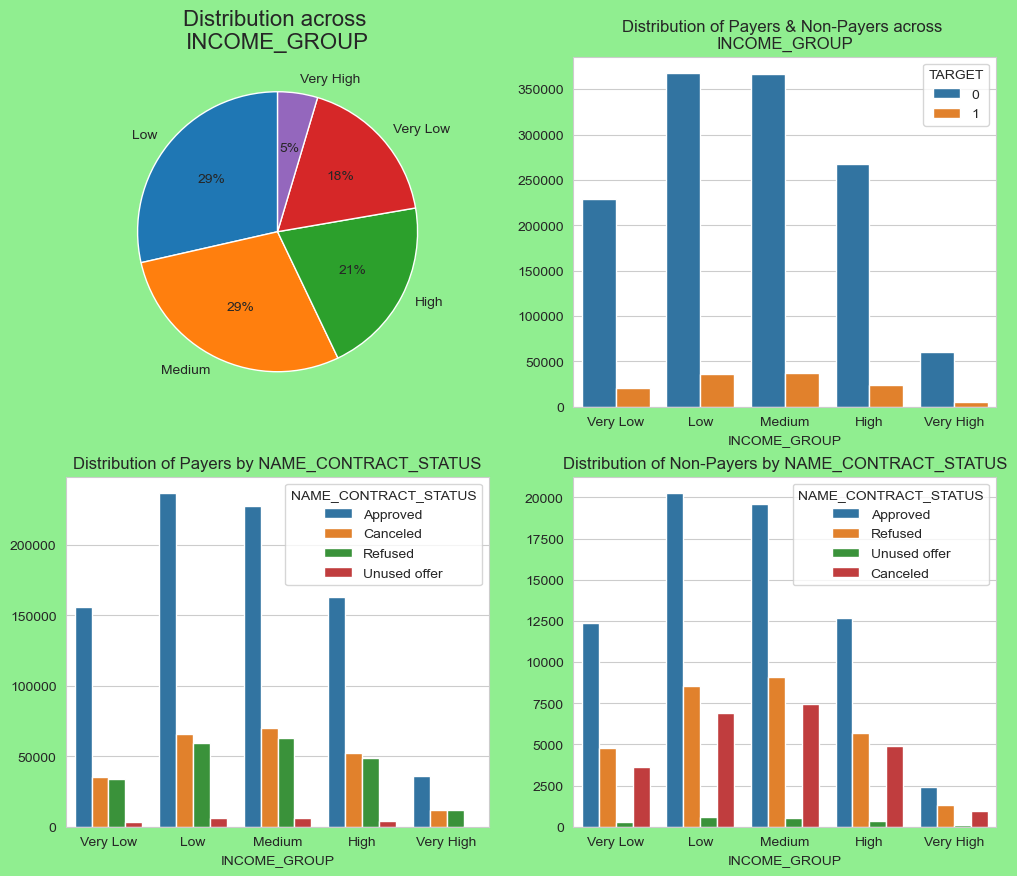

In [273]:
# Plotting different plots to get the insight of applicants of different Income group with respect to their contract status.

stat('INCOME_GROUP','NAME_CONTRACT_STATUS')

## Insights
- Applicants who have Very Low, Low, Medium and High salaries are most interested in Loan facility, only Very high salaried applicants having very low interest in Loans.
- In both the cases their loan was approved also, but if we see the Non-Payers graph those who have Low salary their loan is also approved and it contributed highest numbers, we can say that some of them might become default.

In [274]:
# Defining another function to get stats from different parameters.

def stats(column, hue):
    column=column
    hue=hue

    plt.figure(figsize=[12,12]).set_facecolor('lightgreen')

    plt.subplot(2,2,1)
    merge_df[column].value_counts(normalize=True).plot.barh(color=sns.color_palette('Set1'))
    plt.title('Distribution of {}'.format(column), fontsize=15)
    plt.xlabel('')

    plt.subplot(2,2,2)
    sns.countplot(y=merge_df[column], hue=df['TARGET'])
    plt.title('Distribution of Payer & Non-Payers across \n{}'.format(column), fontsize=15)
    plt.xlabel('')
    plt.ylabel('')

    plt.subplot(2,2,3)
    sns.countplot(y=mergedf_target_0[column], hue=mergedf_target_0[hue])
    plt.title('Distribution of Payers by {}'.format(hue))
    
    plt.subplot(2,2,4)
    sns.countplot(y=mergedf_target_1[column], hue=mergedf_target_1[hue])
    plt.title('Distribution of Non-Payers by {}'.format(hue))
    plt.ylabel('')   

    plt.subplots_adjust(wspace=0.4)
    plt.show()

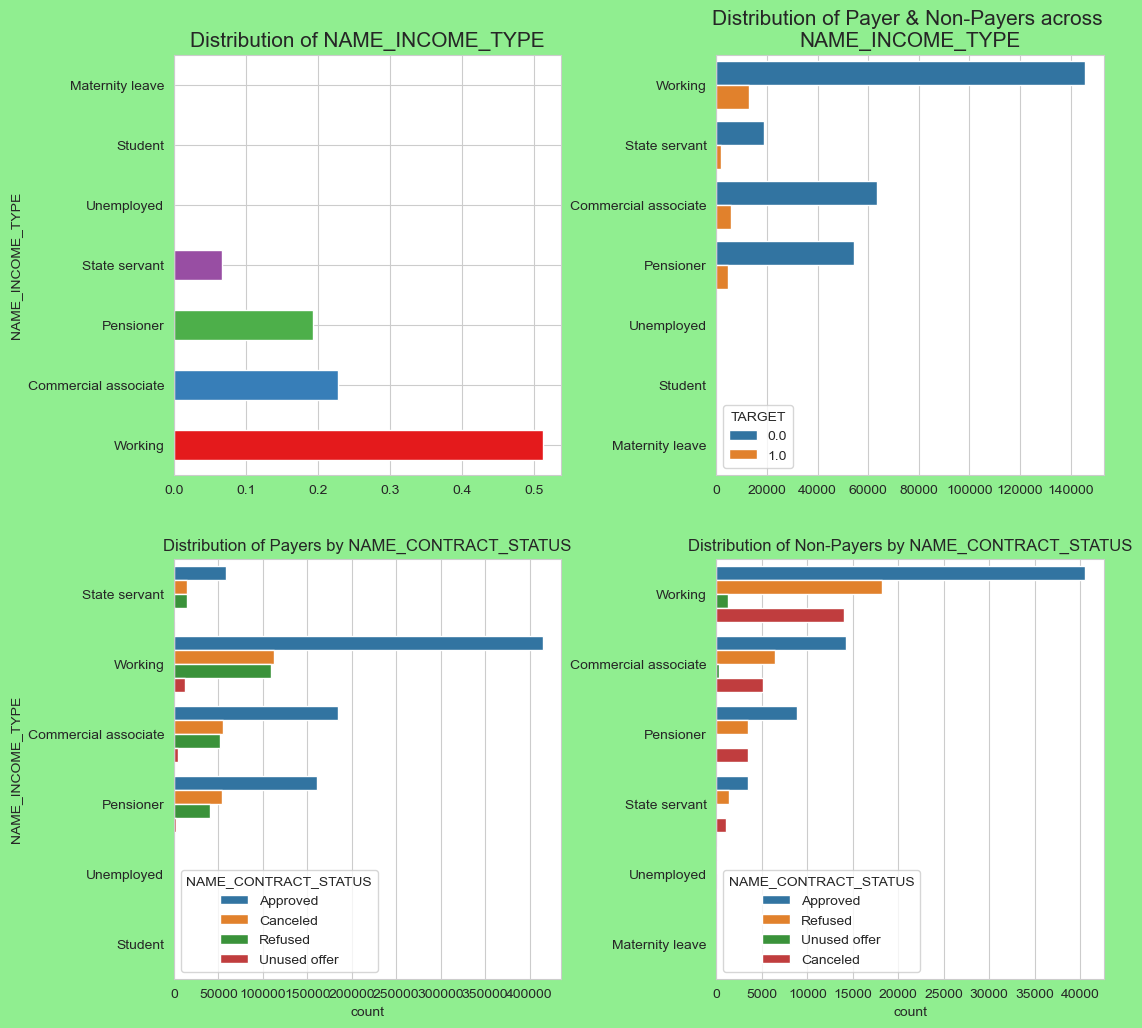

In [275]:
# Plotting different plots to get the insight of applicants of different Income type with respect to their contract status.

stats('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS')

## Insights
- We found that working professional having high interest in Loans and their credit history is also good.
- Applicants who are working professional their loan applications are approved in both Payers and defaulter cases, there is no need to worry as they have very low chances to become default.

In [276]:
merge_df['NAME_EDUCATION_TYPE'] = merge_df['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary')

In [277]:
mergedf_target_0['NAME_EDUCATION_TYPE'] = mergedf_target_0['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary')

In [278]:
mergedf_target_1['NAME_EDUCATION_TYPE'] = mergedf_target_1['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary')

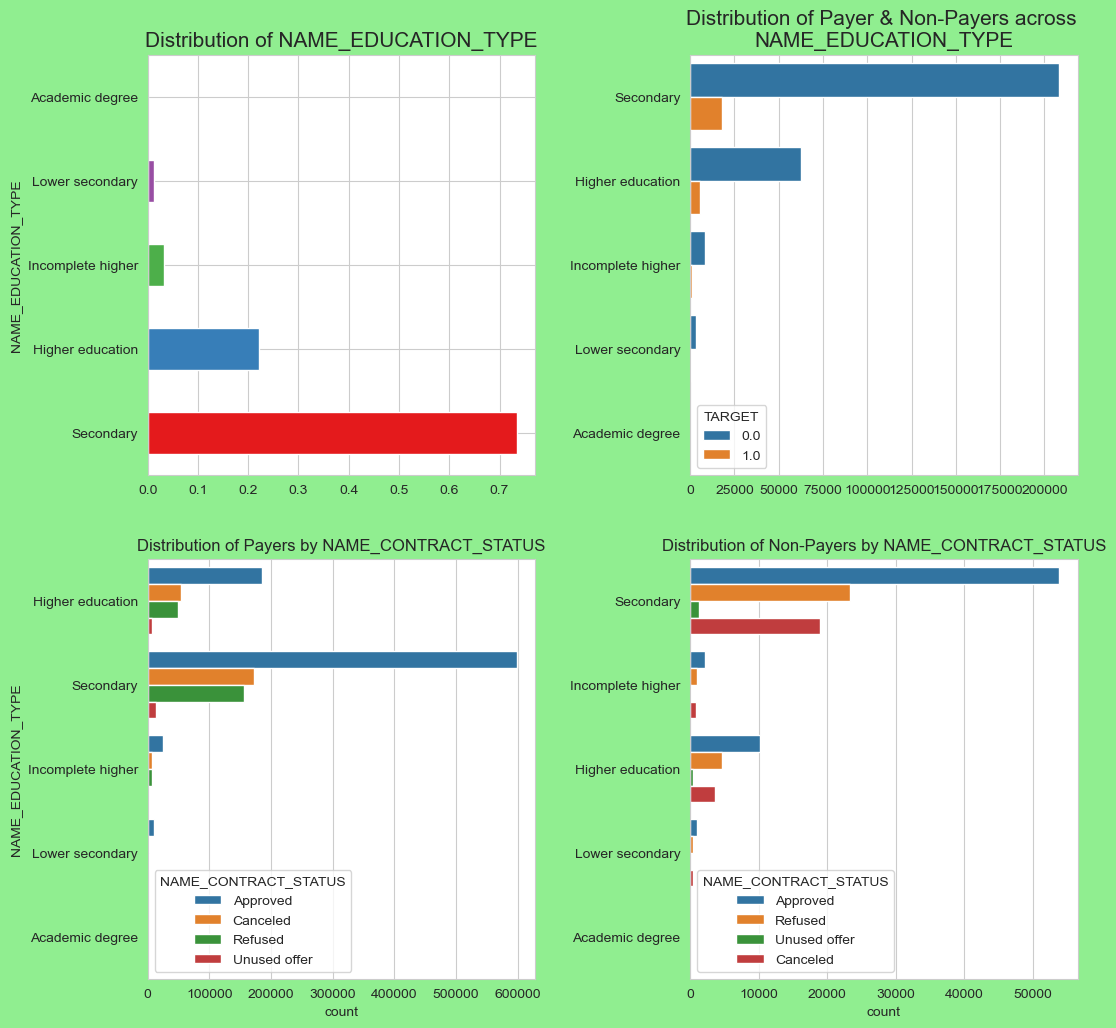

In [279]:
# Plotting different plots to get the insight of applicants of Education type with respect to their contract status.

stats('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

## Insights 
- We found that those applicants who have completed Secondary education are highly interested in Loan products and they are also the most liable to pay the installments on time.
- Also we found that their previous loan application aslo approved as they are the soft targets for our loan products.

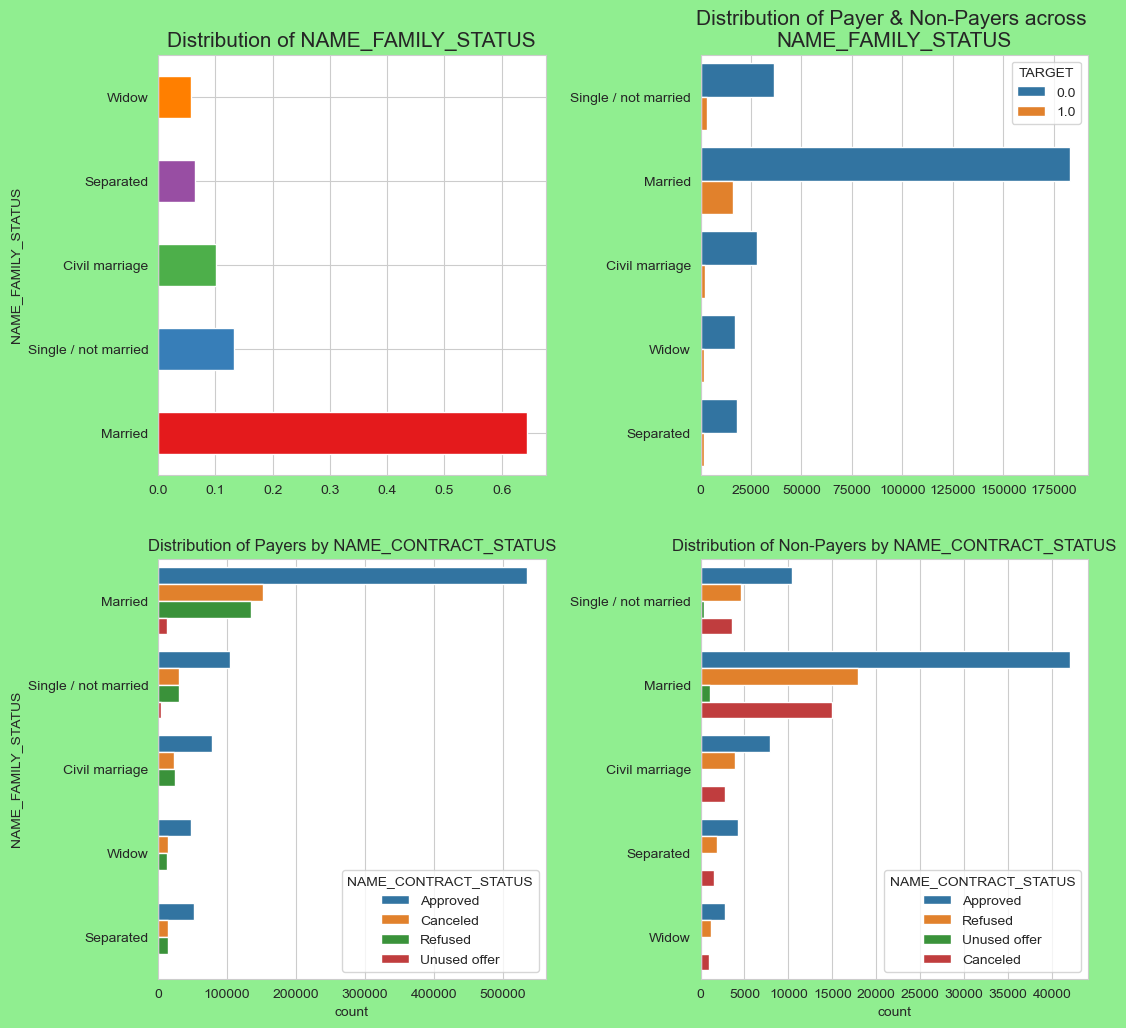

In [280]:
# Plotting different plots to get the insight of applicants of Family status with respect to their contract status.

stats('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

## Insights
- In this case we clearly sees that married applicants are the soft targets as they are most interested in Loan products and they are liable to pay installments on time.
- Also previous applications of married applicants also been approved as they are the soft targets for our company for loan products.

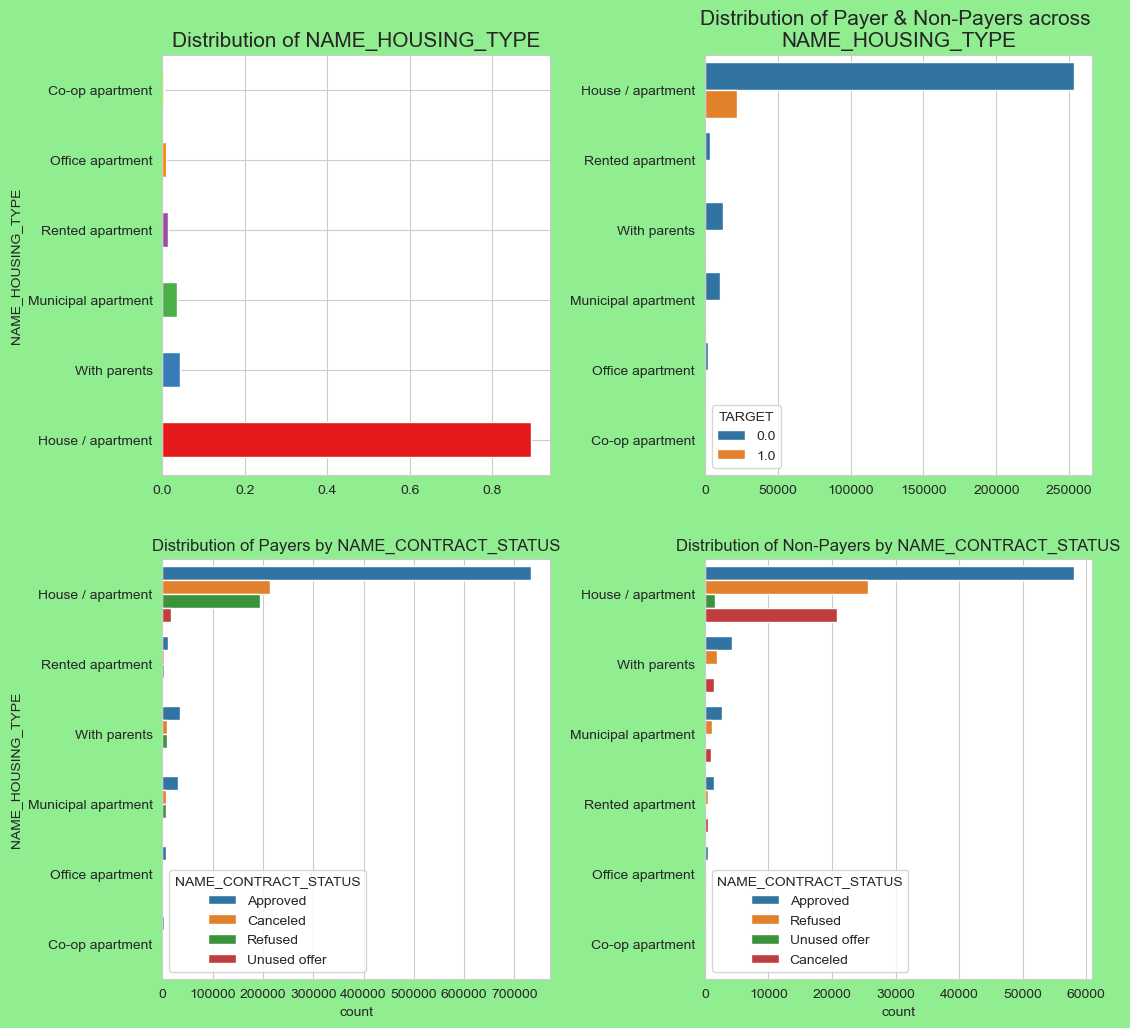

In [281]:
# Plotting different plots to get the insight of applicants of different housing type with respect to their contract status.

stats('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

## Insights
- As we can clearly sees that those applicants who have their own house or flat are more interested in Loan products and they can pay installments on time.
- Also their previous loan application also been approved in both the cases.

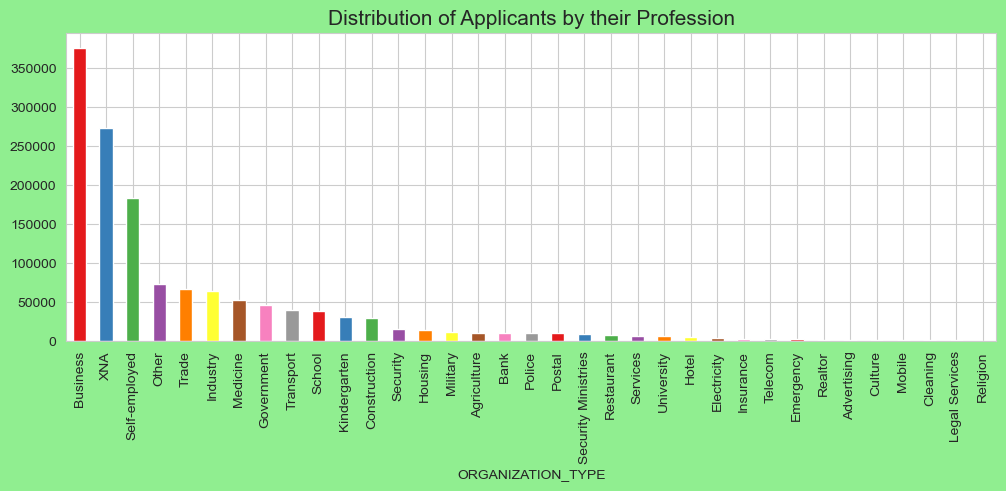

In [282]:
# Plotting bar plot to get the insights from Applicants Profession.

plt.figure(figsize=[12,4]).set_facecolor('lightgreen')

merge_df['ORGANIZATION_TYPE'].value_counts().plot.bar(color=sns.color_palette('Set1'))
plt.title('Distribution of Applicants by their Profession', fontsize=15)

plt.show()

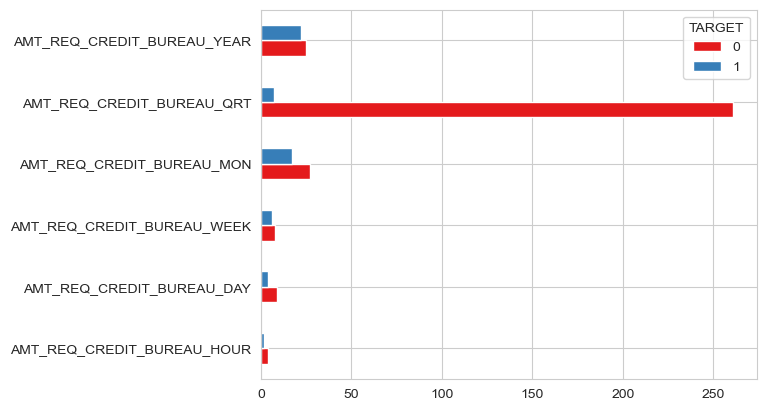

In [283]:
merge_df.groupby(['TARGET'])[['AMT_REQ_CREDIT_BUREAU_HOUR', 
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK', 
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT', 
                        'AMT_REQ_CREDIT_BUREAU_YEAR']].max().T.plot.barh(color=sns.color_palette('Set1'))
plt.show()

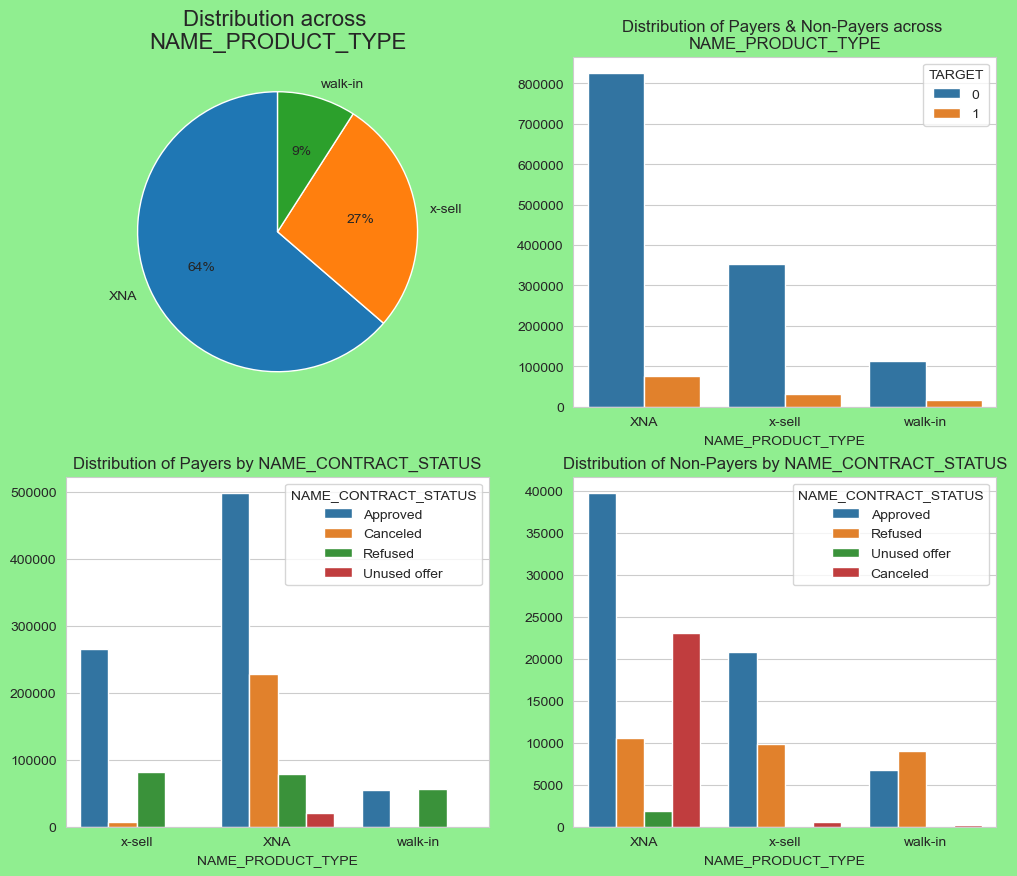

In [284]:
# Plotting different plots to get the insight of applicants who are interested in different product type with respect to their contract status.

stat('NAME_PRODUCT_TYPE','NAME_CONTRACT_STATUS')

## Insights
- The XNA category of Product type is the highest popular among the applicants and its repayment cycle is also good.
- Also XNA product type is also approved in previous application in both the cases.

<Figure size 2000x1000 with 0 Axes>

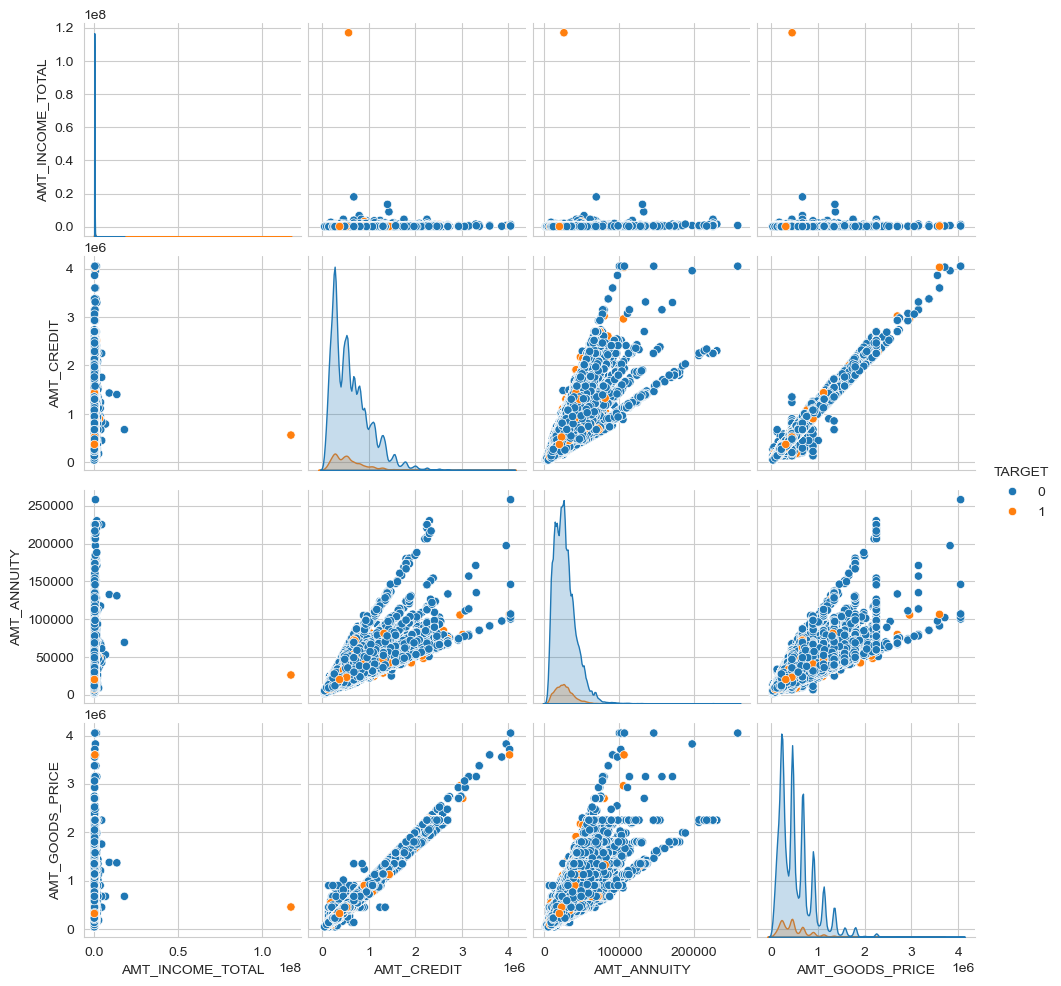

In [285]:
plt.figure(figsize=[20,10]).set_facecolor('lightgreen')
sns.pairplot(df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']], 
             vars=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE'], 
             hue='TARGET')
plt.show()

## Insights 
- We found that AMT_CREDIT and AMT_ANNUITY column they have moderate positive correlation.
- We found that AMT_CREDIT and AMT_GOODS_PRICE column they have positive correlation.
- AMT_ANNUITY and AMT_GOODS_PRICE have moderate positive correlation.
- AMT_ANNUITY and AMT_GOODS_PRICE have moderate positive correlation.